In [38]:
import pandas as pd
import os
import matplotlib.pyplot as plt

**Hợp nhất thông tin mã cổ phiếu và thị trường vào một file**

In [2]:
def merge_stock_market(stock_path, market_path, save_path, date):
    '''
    Trích lấy dữ liệu 'close value' từ file stock và market,
    lưu vào một file riêng để dễ tính toán...
    Các file stock ở trong folder stock và là file excel
    '''
    st = pd.read_csv(stock_path)
    mk = pd.read_csv(market_path)
    close_st = st[['Exchange Date', 'Close']].copy()
    close_st.rename(columns={'Exchange Date': 'Date', 'Close': 'Stock'}, inplace=True)
    if 'Close' in mk.columns:
        close_market = mk[['Date', 'Close']].copy()
        close_market.rename(columns={'Close': 'Market'}, inplace=True)
    elif 'Close/Last' in mk.columns:
        close_market = mk[['Date', 'Close/Last']].copy()
        close_market.rename(columns={'Close/Last': 'Market'}, inplace=True)
    elif 'Price' in mk.columns:
        close_market = mk[['Date', 'Price']].copy()
        close_market.rename(columns={'Price': 'Market'}, inplace=True)
    try:
        close_market['Date'] = pd.to_datetime(close_market['Date'], format=r'%d-%m-%Y')
    except ValueError:
        try:
            close_market['Date'] = pd.to_datetime(close_market['Date'], format=r'%Y-%m-%d')
        except ValueError:
            close_market['Date'] = pd.to_datetime(close_market['Date'], format=r'%d-%m-%y')
    st_mk_info = pd.merge(close_st, close_market, on='Date', how='inner')
    st_mk_info = st_mk_info.sort_values(by='Date')
    st_mk_info['joined date'] = date
    st_mk_info = st_mk_info.drop_duplicates()
    st_mk_info.to_csv(save_path, index=False)

**Xử lý một số trường hợp đặc biệt**

In [88]:
stock_path=r'C:\caocao\2023\NetZero\data v2.0\stock\BRTI.NS.xlsx'
market_path=r'C:\caocao\2023\NetZero\data v2.0\historical_countries\BRTI.NS.csv'
save_path=r'C:\caocao\2023\NetZero\data v2.0\test\BRTI.NS.csv'
date='dfs'
merge_stock_market_v2(stock_path, market_path, save_path, date)

UnboundLocalError: cannot access local variable 'close_market' where it is not associated with a value

**Taiwan**

In [22]:
stock_path=r'C:\caocao\2023\NetZero\data v2.0\taiwan\2891.TW.csv'
market_path=r'C:\caocao\2023\NetZero\data v2.0\taiwan\HistoricalPrices.csv'
save_path=r'C:\caocao\2023\NetZero\data v2.0\test\2891.TW.csv'
date='17-02-2022'
#merge_stock_market(stock_path, market_path, save_path, date)

st = pd.read_csv(stock_path)

mk = pd.read_csv(market_path)
close_st = st[['Date', 'Close']].copy()
close_st.rename(columns={'Close': 'Stock'}, inplace=True)
if 'Close' in mk.columns:
    close_market = mk[['Date', 'Close']].copy()
    close_market.rename(columns={'Close': 'Market'}, inplace=True)
elif 'Close/Last' in mk.columns:
    close_market = mk[['Date', 'Close/Last']].copy()
    close_market.rename(columns={'Close/Last': 'Market'}, inplace=True)
elif 'Price' in mk.columns:
    close_market = mk[['Date', 'Price']].copy()
    close_market.rename(columns={'Price': 'Market'}, inplace=True)
close_market['Date'] = pd.to_datetime(close_market['Date'], errors='coerce')
close_st['Date'] = pd.to_datetime(close_st['Date'], errors='coerce')
# try:
#     close_market['Date'] = pd.to_datetime(close_market['Date'], format=r'%d-%m-%Y')
# except ValueError:
#     try:
#         close_market['Date'] = pd.to_datetime(close_market['Date'], format=r'%Y-%m-%d')
#     except ValueError:
#         try:
#             close_market['Date'] = pd.to_datetime(close_market['Date'], format=r'%d-%m-%y')
st_mk_info = pd.merge(close_st, close_market, on='Date', how='inner')
st_mk_info = st_mk_info.sort_values(by='Date')
st_mk_info['joined date'] = date
st_mk_info = st_mk_info.drop_duplicates()
st_mk_info.to_csv(save_path, index=False)

C:\Users\csc\AppData\Local\Temp\ipykernel_15432\3672665616.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  close_market['Date'] = pd.to_datetime(close_market['Date'], errors='coerce')
C:\Users\csc\AppData\Local\Temp\ipykernel_15432\3672665616.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  close_st['Date'] = pd.to_datetime(close_st['Date'], errors='coerce')


**Thử test một file**

In [54]:
stock_path=r'C:\caocao\2023\NetZero\data v2.0\stock\0010.HK.xlsx'
market_path=r'C:\caocao\2023\NetZero\data v2.0\markets\000001.SS.csv'
save_path=r'C:\caocao\2023\NetZero\data v2.0\stocks_markets\0010.HK.csv'
merge_stock_market(stock_path, market_path, save_path, '19-01-2023')

**Thực hiện nhiều file**

In [72]:
root = pd.read_csv(r'C:\caocao\2023\NetZero\data v2.0\indices_countries_combine.csv')
root['Date Joined'] = pd.to_datetime(root['Date Joined'], format=r'%d-%m-%y')
code_index = {}
for i in range(len(root)):
    code_index[root.loc[i, 'Code']] = (root.loc[i, 'Date Joined'], root.loc[i, 'Index'])

In [73]:
folder = r'C:\caocao\2023\NetZero\data v2.0\stock'
folder_market = r'C:\caocao\2023\NetZero\data v2.0\markets'
save_folder = r'C:\caocao\2023\NetZero\data v2.0\stocks_markets'
files = os.listdir(folder)
error = []
for f in files:
    stem = f[:-5]
    try:
        date, market = code_index[stem]
        stock_path = fr'{folder}\{f}'
        market_path = fr'{folder_market}\{market}.csv'
        save_path = fr'{save_folder}\{stem}.csv'
        merge_stock_market(stock_path, market_path, save_path, date)
        print(f'{f} -- done')
    except Exception as e:
        print(f'Error: {f}  ==> {e}')
        error.append(stem)
print(f'Đã xử lý {len(files)}..., lỗi {len(error)} files')

0010.HK.xlsx -- done
0017.HK.xlsx -- done
002475.SZ.xlsx -- done
012330.KS.xlsx -- done
0175.HK.xlsx -- done
051910.KS.xlsx -- done
055550.KS.xlsx -- done
066570.KS.xlsx -- done
0700.HK.xlsx -- done
Error: 086790.KS.xlsx  ==> [Errno 2] No such file or directory: 'C:\\caocao\\2023\\NetZero\\data v2.0\\markets\\nan.csv'
0992.HK.xlsx -- done
138930.KS.xlsx -- done
1925.T.xlsx -- done
1928.T.xlsx -- done
Error: 2317.TW.xlsx  ==> [Errno 2] No such file or directory: 'C:\\caocao\\2023\\NetZero\\data v2.0\\markets\\nan.csv'
2324.TW.xlsx -- done
2587.T.xlsx -- done
2802.T.xlsx -- done
2882.TW.xlsx -- done
2883.TW.xlsx -- done
2884.TW.xlsx -- done
2891.TW.xlsx -- done
3289.T.xlsx -- done
4307.T.xlsx -- done
4452.T.xlsx -- done
4502.T.xlsx -- done
4528.T.xlsx -- done
5857.T.xlsx -- done
600887.SS.xlsx -- done
603680.SS.xlsx -- done
6701.T.xlsx -- done
6702.T.xlsx -- done
6723.T.xlsx -- done
6752.T.xlsx -- done
6758.T.xlsx -- done
7010.SR.xlsx -- done
7201.T.xlsx -- done
7752.T.xlsx -- done
8306.

**Tổng hợp nhiều file cùng một lúc**

Cái này cũ rồi, phiên bản cho giai đoạn 1

In [165]:
indice = pd.read_excel(r'C:\caocao\2023\NetZero\data v2.0\indices.xlsx')
indice['Date Joined'] = pd.to_datetime(indice['Date Joined'], format=r'%d-%m-%Y')
folder = r'C:\caocao\2023\NetZero\data v2.0\stock'
folder_market = r'C:\caocao\2023\NetZero\data v2.0\historical_countries'
save_folder = r'C:\caocao\2023\NetZero\data v2.0\close_values_v2'
files = os.listdir(folder)
error = []
for f in files:
    stem = f[:-5]
    try:
        date = None
        for i in range(indice.shape[0]):
            if indice.iloc[i, 0]==stem:
                date = indice.iloc[i, 6]
                break
        if date==None:
            raise Exception('cannot detect joined date...')
        stock_path = fr'{folder}\{f}'
        market_path = fr'{folder_market}\{stem}.csv'
        save_path = fr'{save_folder}\{stem}.csv'
        merge_stock_market(stock_path, market_path, save_path, date)
        print(f'{f} -- done')
    except Exception as e:
        print(f'Error: {f}  ==> {e}')
        error.append(stem)
print(f'Đã xử lý {len(files)}...')

0010.HK.xlsx -- done
0017.HK.xlsx -- done
002475.SZ.xlsx -- done
012330.KS.xlsx -- done
0175.HK.xlsx -- done
051910.KS.xlsx -- done
055550.KS.xlsx -- done
066570.KS.xlsx -- done
0700.HK.xlsx -- done
086790.KS.xlsx -- done
0992.HK.xlsx -- done
138930.KS.xlsx -- done
1925.T.xlsx -- done
1928.T.xlsx -- done
Error: 2317.TW.xlsx  ==> [Errno 2] No such file or directory: 'C:\\caocao\\2023\\NetZero\\data v2.0\\historical_countries\\2317.TW.csv'
2324.TW.xlsx -- done
2587.T.xlsx -- done
2802.T.xlsx -- done
2882.TW.xlsx -- done
2883.TW.xlsx -- done
2884.TW.xlsx -- done
2891.TW.xlsx -- done
3289.T.xlsx -- done
4307.T.xlsx -- done
4452.T.xlsx -- done
4502.T.xlsx -- done
4528.T.xlsx -- done
5857.T.xlsx -- done
600887.SS.xlsx -- done
603680.SS.xlsx -- done
6701.T.xlsx -- done
6702.T.xlsx -- done
6723.T.xlsx -- done
6752.T.xlsx -- done
6758.T.xlsx -- done
7010.SR.xlsx -- done
7201.T.xlsx -- done
7752.T.xlsx -- done
8306.T.xlsx -- done
8309.T.xlsx -- done
8316.T.xlsx -- done
8411.T.xlsx -- done
8750.T

In [117]:
for i in error:
    print(i, end='   ')

2317.TW   7010.SE   ASSAb.ST   BAESY.PK   BAYGn.DE   BEIG.DE   BERY.K   BIC.CN   BLK   BYG0y.F   COLOb.CO   CRDI.MI   CRM   DMP.AX   ENGIE.PA   GIVN.S   GT.O   IDEXY.PQ   KPN.AS   MAERSKb.CO   NSRGY.PK   PEP.O   PRTP.PA   PYPL.O   SGOB.PA   SKAb.ST   SMPNY.PK   SPOT.K   TELIA.ST   YUMC.K   

In [100]:
folder = r'C:\caocao\2023\NetZero\data v2.0\close_values_v2'
files = os.listdir(folder)
fs = []
lack=[]
for f in files:
    fs.append(f[:-4])
for c in indice['Code'].values:
    if c not in fs:
        lack.append(c)
for i in lack:
    print(i, end='  ')

IDEXY  PRTP.SA  BEI.DE  NSRGY  SGO.PA  7010.SR  TELIA.HE  GIVN.SW  CRM.VI  MAERSK-B.CO  COLO-B.CO  BAYGN.DE  PEP  ASSA-B.ST  ACN  RR.L  NWSA  GIB  Skab.SB  PYPL  BAESY  BERY  2503.T  KKPNY  BLK  ESSITYBN.MX  2317.TW  YUMC  ENGI.PA  DPM.AX  LISN.S  BBVA.MC  CIB  UNCRY  105560.KS  SHBa.ST  SPOT.K  GT  BOUY.PA  ACM  SMPNY  

In [92]:
MA = 'BXB.AX'
stock_path=fr'C:\caocao\2023\NetZero\data v2.0\stock\{MA}.xlsx'
market_path=fr'C:\caocao\2023\NetZero\data v2.0\historical_countries\{MA}.csv'
save_path=fr'C:\caocao\2023\NetZero\data v2.0\test\{MA}.csv'
date='dfs'
merge_stock_market_v2(stock_path, market_path, save_path, date)

**Định nghĩa các lớp tính toán**

In [4]:
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
import numpy as np
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt


class Stock:
    '''
    Event study for each stock index
    '''
    
    def __init__(self, file, event_window = (-5, 5), estimation_window = 200):
        '''
        file - path file saving the info of stock index
        event_date - date occurence an event
        '''
        self.data = pd.read_csv(file)
        self.event_window = event_window
        self.estimation_window = estimation_window
        self.index = Path(file).stem
        if len(self.data)!=0:
            self.data['Date'] = Stock.convert2date(self.data['Date'])
            self.data['joined date'] = Stock.convert2date(self.data['joined date'])
            self.data['Stock'] = Stock.convert2float(self.data['Stock'])
            self.data['Market'] = Stock.convert2float(self.data['Market'])
            self.event_date = self.data.loc[0, 'joined date']
        else:
            self.event_date = 'Unkown'
        
    
    def valid_data(self):
        '''
        Valid the data with the setting option
        '''
        if len(self.data) < self.event_window[1] - self.event_window[0] + self.estimation_window:
            return False
        if self.event_date.weekday()==5:
            self.event_date = self.event_date + timedelta(days=2)
        elif self.event_date.weekday()==6:
            self.event_date = self.event_date + timedelta(days=1)
        # check data with event_window
        event_index = self.data[self.data['Date'] == self.event_date].index
        if len(event_index)==0:
            self.data['distance'] = self.data['Date'] - self.data['joined date']
            max_distance = self.data['distance'].max()
            if max_distance.days<=0:
                return False
            else:                
                self.data['distance'] = self.data['distance'].abs()
                event_index = self.data['distance'].idxmin()           
        else:
            event_index = event_index[0]
        right_event_window_index = event_index + self.event_window[1]
        if right_event_window_index not in self.data.index:
            return False
        # check data with estimation_window
        left_estimation_window_index = event_index - self.estimation_window + self.event_window[0]
        if left_estimation_window_index not in self.data.index:
            return False
        return True
    
    def get_selected_data(self):
        '''
        Select data fitting event_window and estimation window for the next analysis
        '''
        if len(self.data) < self.event_window[1] - self.event_window[0] + self.estimation_window:
            return (False, 'The data range does not fit the estimation period and event window')
        if self.event_date.weekday()==5:
            self.event_date = self.event_date + timedelta(days=2)
        elif self.event_date.weekday()==6:
            self.event_date = self.event_date + timedelta(days=1)
        # check data with event_window
        event_index = self.data[self.data['Date'] == self.event_date].index
        if len(event_index)==0:
            # Tính ngày gần nhất với ngày gia nhập
            self.data['distance'] = self.data['Date'] - self.data['joined date']
            max_distance = self.data['distance'].max()
            if max_distance.days<=0:
                return (False, 'All the data prior to the event data')
            else:                
                self.data['distance'] = self.data['distance'].abs()
                event_index = self.data['distance'].idxmin()
        else:
            event_index = event_index[0]
        right_event_window_index = event_index + self.event_window[1]
        if right_event_window_index not in self.data.index:
            return (False, 'The event window data is out of data range.')
        # check data with estimation_window
        left_estimation_window_index = event_index - self.estimation_window + self.event_window[0]
        if left_estimation_window_index not in self.data.index:
            return (False, 'The estimation period is out of data range.')
        
        self.estimation_data = self.data.iloc[left_estimation_window_index:event_index+self.event_window[0]].copy()
        self.estimation_data = self.estimation_data.reset_index()
        self.estimation_data = self.estimation_data.fillna(method='ffill')
        self.estimation_data = self.estimation_data.fillna(method='bfill')
        
        self.event_window_data = self.data.iloc[event_index+self.event_window[0]:right_event_window_index+1].copy()
        self.event_window_data = self.event_window_data.reset_index()
        self.event_window_data = self.event_window_data.fillna(method='ffill')
        self.event_window_data = self.event_window_data.fillna(method='bfill')
        return (True, None)    
    
    def calculate_actual_return(self):
        '''
        Actual return calculation with the set of event window and estimation window
        '''
        for i in range(1, self.estimation_data.shape[0]):
            self.estimation_data.loc[i, 'actual_return_stock'] = \
            (self.estimation_data.loc[i, 'Stock'] - self.estimation_data.loc[i-1, 'Stock'])*100/\
            self.estimation_data.loc[i-1, 'Stock']

            self.estimation_data.loc[i, 'actual_return_market'] = \
            (self.estimation_data.loc[i, 'Market'] - self.estimation_data.loc[i-1, 'Market'])*100/\
            self.estimation_data.loc[i-1, 'Market']
        
        for i in range(self.event_window_data.shape[0]):
            if i==0:
                last_index = len(self.estimation_data) - 1
                self.event_window_data.loc[i, 'actual_return_stock'] = \
                (self.event_window_data.loc[i, 'Stock'] - self.estimation_data.loc[last_index, 'Stock'])*100/\
                self.estimation_data.loc[last_index, 'Stock']

                self.event_window_data.loc[i, 'actual_return_market'] = \
                (self.event_window_data.loc[i, 'Market'] - self.estimation_data.loc[last_index, 'Market'])*100/\
                self.estimation_data.loc[last_index, 'Market']
            else:
                self.event_window_data.loc[i, 'actual_return_stock'] = \
                (self.event_window_data.loc[i, 'Stock'] - self.event_window_data.loc[i-1, 'Stock'])*100/\
                self.event_window_data.loc[i-1, 'Stock']

                self.event_window_data.loc[i, 'actual_return_market'] = \
                (self.event_window_data.loc[i, 'Market'] - self.event_window_data.loc[i-1, 'Market'])*100/\
                self.event_window_data.loc[i-1, 'Market']
        
    
    def calculate_expected_return(self):
        '''
        Expected return calculation using the Capital Pricing Model (CAMP)
        '''
        model = LinearRegression()

        model.fit(self.estimation_data.actual_return_market.values[1:].reshape(-1,1),
                  self.estimation_data.actual_return_stock.values[1:].ravel())
        beta = model.coef_[0]
        alpha = model.intercept_
        #Tính cho event window
        for i in range(self.event_window_data.shape[0]):
            self.event_window_data.loc[i, 'expected_return'] = alpha + \
            beta * self.event_window_data.loc[i, 'actual_return_market']
            
        #Tính trong estimation window
        for i in range(self.estimation_data.shape[0]):    
            self.estimation_data.loc[i, 'expected_return'] = alpha + \
            beta * self.estimation_data.loc[i, 'actual_return_market']
        
    def calculate_abnormal_return(self):
        '''
        Get abnormal return 
        '''
        
        self.event_window_data['abnormal_return'] = self.event_window_data['actual_return_stock'] - \
        self.event_window_data['expected_return']
        
        self.estimation_data['abnormal_return'] = self.estimation_data['actual_return_stock'] - \
        self.estimation_data['expected_return']
        
    def calculate_cumulative_abnormal_return(self):
        '''
        calculate cumulative abnormal return in event window size
        
        the next day = sum of all prior days
        '''
        self.event_window_data['cumulative_abnormal_return'] = self.event_window_data['abnormal_return']
        for i in range(1, len(self.event_window_data)):
            self.event_window_data.loc[i, 'cumulative_abnormal_return'] += self.event_window_data.loc[i-1, 'cumulative_abnormal_return']                
    
    
    def get_cumulative_abnormal_return(self):
        '''
        get cumulative abnormal return of whole event window
        '''
        self.CAR = sum(self.event_window_data['abnormal_return'])
        return self.CAR
    
    def do_one_sample_Ttest_abnormal_return(self, alpha = 0.05):
        '''
        The one-sample T-test checks if the sample mean is significantly different from a known population mean.
        In this case, population mean = 0. A low P-value (less than 0.05) suggests a significant 
        difference between the sample mean and the population mean (0), leading you to reject the null hypothesis.
        '''
        t_stat, p_value = stats.ttest_1samp(self.event_window_data['abnormal_return'].values, 0)
        self.Ttest = (t_stat, p_value)
        return t_stat, p_value
    
    def calculate_side_data(self, ab_path, img_folder, img_export=False):
        '''
        execute all data calculation functions 
        '''
        self.calculate_actual_return()
        self.calculate_expected_return()
        self.calculate_abnormal_return()
        self.save_detail_data(ab_path, img_folder, img_export)
        self.calculate_cumulative_abnormal_return()
        self.get_cumulative_abnormal_return()
    
    def do_t_statistic(self):
        '''
        by formula
        '''
        average_abnormal_return = sum(self.event_window_data['abnormal_return'])/len(self.event_window_data['abnormal_return'])
        standard_deviation_abnormal_return = np.std(self.event_window_data['abnormal_return'].values, ddof=1)
        standard_error = standard_deviation_abnormal_return / (len(self.event_window_data['abnormal_return'])**0.5)
        t_statistic = average_abnormal_return / standard_error
        
        return t_statistic
    
    def save_detail_data(self, path, img_folder, img_export=False):
        '''
        save to excel file
        '''
        detail = pd.concat([self.estimation_data, self.event_window_data], ignore_index=True)
        detail.to_excel(path, index=False)
        if img_export:
            plt.scatter(self.estimation_data['actual_return_stock'].values[1:], 
                        self.estimation_data['actual_return_market'].values[1:], color='#ff6200')

            # Adding labels and title
            plt.xlabel('actual return of stock')
            plt.ylabel('actual return of market')
            plt.title(f'Correlation between actual return stock and market: {self.index}')
            plt.savefig(f'{img_folder}/{self.index}.png')
            plt.clf()
            
    
    def calculate_parametric_t_test(self):
        '''
        Theo file Quỳnh gửi lần 2, theo cách tính mới: t_test_compute.docx
        reference: https://www.eventstudytools.com/significance-tests#Csect
        ---------------------------------------------
        M_i - denotes the number of non-missing returns during the estimation window
        M_i = T1-T0+1 in case of no missing observations
        K - the degree of freedom = 2 for the market model
        T0-T1 - the estimation window size
        T1+1 - T2 - The event window size
        L2 = T2-T1 - length of the event window
        '''
        M_i = len(self.estimation_data)
        K = 2
        L2 = len(self.event_window_data)
        s_ar_sum = 0
        for i in range(1, M_i):
            s_ar_sum+=(self.estimation_data.loc[i, 'abnormal_return'])**2
        
        s_ar = (s_ar_sum/(M_i-K))**0.5
        ar_on_event_day = self.event_window_data[self.event_window_data['Date']==self.event_date]['abnormal_return']
        if len(ar_on_event_day)!=0:
            t_ar = ar_on_event_day.iloc[0]/s_ar
        else:
            t_ar = 0
        
        car = sum(self.event_window_data['abnormal_return'])
        s_car = (L2*s_ar_sum/(M_i-K))**0.5
        t_car = car/s_car
        aar = car/L2 if L2!=0 else car
        return t_ar, t_car, aar, car

    @staticmethod
    def convert2date(column):
        try:
            return pd.to_datetime(column, format=r'%d-%m-%Y')
        except ValueError:
            try:
                return pd.to_datetime(column, format=r'%Y-%m-%d')
            except ValueError:
                return pd.to_datetime(column, format=r'%d-%m-%y')
    
    @staticmethod
    def convert2float(column):
        try:
            return column.astype(float)
        except ValueError:
            return column.str.replace(',', '').astype(float)
                  

In [35]:
close_folder = r'C:\caocao\2023\NetZero\data v2.0\close_values_v2'
files = os.listdir(close_folder)
log = {}
for f in files:
    path = f'{close_folder}\{f}'
    stem, extension = os.path.splitext(f)
    if extension !='.csv':
            continue
    #path = r'C:\caocao\2023\NetZero\data v2.0\stocks_markets\0010.HK.csv'
    stock = Stock(path, event_window = (-5, 5), estimation_window = 200)
    status, message = stock.get_selected_data()
    if status:
        stock.calculate_actual_return()
        stock.calculate_expected_return()
        stock.calculate_abnormal_return()
        stock.get_cumulative_abnormal_return()
        t_ar,t_car = stock.calculate_parametric_t_test()
        log[stem] = {'Date joined': stock.event_date,
                                                't_ar':t_ar, 't_car': t_car}
    else:
        log[stem] = {'Date joined': stock.event_date,
                                                't_ar':message, 't_car': '-'}
log = pd.DataFrame(log)
log = log.T
log.to_excel(r'C:\caocao\2023\NetZero\data v2.0\report\v_10\logs.xlsx')

In [36]:
# Phiên bản 1 - update theo cách tính mới, thử một kịch bản
close_folder = r'C:\caocao\2023\NetZero\data v2.0\close_values_v2'
group_info = r'C:\caocao\2023\NetZero\data v2.0\indices_v2.xlsx'
report_folder = r'C:\caocao\2023\NetZero\data v2.0\report\v_3'
setting={'event window':(-5, 5), 'estimation window': 200}

event = Event_Study(close_folder, group_info, report_folder, setting)
log = event.run()
event.plot_figure_01()
event.plot_figure_02()
event.plot_figure_03()
event.plot_figure_04()

stocks = []
files = os.listdir(close_folder)
print('số lượng file: ', len(files))
log = {}
for f in files:
    try:
        path = f'{close_folder}\{f}'
        stem, extension = os.path.splitext(f)
        if extension !='.csv':
            continue
        sector = group_info[stem]
        stock = Stock(path, event_window = self.setting['event window'],
                      estimation_window = self.setting['estimation window'])
        status, message = stock.get_selected_data()
        if status:
            pt = os.path.join(self.report_folder, 'details')
            img_pt = os.path.join(self.report_folder, 'graph')
            if not os.path.exists(pt):
                os.makedirs(pt, mode=0o755)
            if not os.path.exists(img_pt):
                os.makedirs(img_pt, mode=0o755)
            ab_path = fr'{self.report_folder}\details\{stem}.xlsx'                    
            stock.calculate_side_data(ab_path, img_pt, True)
            t_stat, p_value = stock.do_one_sample_Ttest_abnormal_return()
            self.stocks.append(stock)
            log[stem] = {'Sector':sector, 'Date joined': stock.event_date,
                                                't_stat':t_stat, 'p value': p_value}
        else:
            log[stem] = {'Sector':sector, 'Date joined': stock.event_date,
                                                't_stat':message, 'p value': '-'}
    except Exception as e:
        print(f'error at file {f}: {e}')
        #raise e

with open(fr'{self.report_folder}\readme.txt', 'w+') as f:
    f.write(str(self.setting))
# save log
log = pd.DataFrame(log)
log = log.T
log.to_excel(fr'{self.report_folder}\logs.xlsx')
return log

số lượng file:  307
số lượng file:  307
error at file 0010.HK.csv: string indices must be integers, not 'str'
error at file 0017.HK.csv: string indices must be integers, not 'str'
error at file 002475.SZ.csv: string indices must be integers, not 'str'
error at file 012330.KS.csv: string indices must be integers, not 'str'
error at file 0175.HK.csv: string indices must be integers, not 'str'
error at file 051910.KS.csv: string indices must be integers, not 'str'
error at file 055550.KS.csv: string indices must be integers, not 'str'
error at file 066570.KS.csv: string indices must be integers, not 'str'
error at file 0700.HK.csv: string indices must be integers, not 'str'
error at file 086790.KS.csv: string indices must be integers, not 'str'
error at file 0992.HK.csv: string indices must be integers, not 'str'
error at file 138930.KS.csv: string indices must be integers, not 'str'
error at file 1925.T.csv: string indices must be integers, not 'str'
error at file 1928.T.csv: string indi

NameError: name 'self' is not defined

<Figure size 640x480 with 0 Axes>

In [24]:
class Event_Study:
    '''
    Event study for many stock indices: Cách tính t test cũ
    '''
    def __init__(self, folder, group_file, report_folder, setting={'event window':(-5, 5), 'estimation window': 200}):
        '''
        folder: thư mục chứa các thông tin close value của các mã
        group_file: file chứa thông tin nhóm của từng mã
        report_folder: thư mục lưu file
        '''
        self.folder = folder
        self.group_sectors, self.countries, self.company_name = Event_Study.read_group_info(group_file)
        self.setting = setting
        self.report_folder = report_folder
    
    def run(self):
        '''
        Chạy theo cách tính đầu tiên, tính test bình thường        
        '''
        self.stocks = []
        files = os.listdir(self.folder)
        print('số lượng file: ', len(files))
        log = {}
        for f in files:
            try:
                path = f'{self.folder}\{f}'
                stem, extension = os.path.splitext(f)
                if extension !='.csv':
                    continue
                sector = self.group_sectors[stem]
                stock = Stock(path, event_window = self.setting['event window'],
                              estimation_window = self.setting['estimation window'])
                status, message = stock.get_selected_data()
                if status:
                    pt = os.path.join(self.report_folder, 'details')
                    img_pt = os.path.join(self.report_folder, 'graph')
                    if not os.path.exists(pt):
                        os.makedirs(pt, mode=0o755)
                    if not os.path.exists(img_pt):
                        os.makedirs(img_pt, mode=0o755)
                    ab_path = fr'{self.report_folder}\details\{stem}.xlsx'                    
                    stock.calculate_side_data(ab_path, img_pt, True)
                    t_stat, p_value = stock.do_one_sample_Ttest_abnormal_return()
                    self.stocks.append(stock)
                    log[stem] = {'Sector':sector, 'Date joined': stock.event_date,
                                                        't_stat':t_stat, 'p value': p_value}
                else:
                    log[stem] = {'Sector':sector, 'Date joined': stock.event_date,
                                                        't_stat':message, 'p value': '-'}
            except Exception as e:
                print(f'error at file {f}: {e}')
                #raise e
        
        with open(fr'{self.report_folder}\readme.txt', 'w+') as f:
            f.write(str(self.setting))
        # save log
        log = pd.DataFrame(log)
        log = log.T
        log.to_excel(fr'{self.report_folder}\logs.xlsx')
        return log
    
    def save_detail_data(self):
        '''
        Save estimation window and event window for checking
        '''
        
        combine = pd.concat([df1, df2], ignore_index=True)
    
    
    def plot_figure_01(self):
        '''
        TABLE 1: ABNORMAL RETURN BY SECTORS
        
        '''
        event_window_size = self.setting['event window'][1] - self.setting['event window'][0] + 1
        empty = pd.Series([0 for i in range(event_window_size)])

        sectors = set(self.group_sectors.values())
        sector_abnormal_dicts = {key: [empty.copy(), 0] for key in sectors}
        sector_cummulative_dicts = {key: [empty.copy(), 0] for key in sectors}

        report = {}
        for stock in self.stocks:
            sector = self.group_sectors[stock.index]
            sector_abnormal_dicts[sector][0]+=stock.event_window_data.abnormal_return
            sector_abnormal_dicts[sector][1]+=1
            
            sector_cummulative_dicts[sector][0]+=stock.event_window_data.cumulative_abnormal_return
            sector_cummulative_dicts[sector][1]+=1
            
            

        for k, v in sector_abnormal_dicts.items():
            sector_abnormal_dicts[k][0] = sector_abnormal_dicts[k][0]/sector_abnormal_dicts[k][1]
            sector_cummulative_dicts[k][0] = sector_cummulative_dicts[k][0]/sector_cummulative_dicts[k][1]
            
            aar_t_stat, aar_p_value = stats.ttest_1samp(sector_abnormal_dicts[k][0].values, 0)
            
            car_t_stat, car_p_value = stats.ttest_1samp(sector_cummulative_dicts[k][0].values, 0)
            
            report[k] = {'Number of companies':sector_abnormal_dicts[k][1], 
                         'Degree of Freedom': '-',
                         'Average Abnormal Return (AAR)': np.mean(sector_abnormal_dicts[k][0].values),
                         'AAR-T test': aar_t_stat, 
                         'AAR p-value': aar_p_value,
                         'Cummulative Abnormal Return (CAR)': np.mean(sector_cummulative_dicts[k][0].values),
                         'CAR T test': car_t_stat,
                         'CAR P value': car_p_value}
            detail = pd.DataFrame({
                "Average Abnormal Return (AAR)": sector_abnormal_dicts[k][0],
                "Cummulative Abnormal Return (CAR)": sector_cummulative_dicts[k][0]
            })
            sector_path = f'{self.report_folder}\sectors'
            if not os.path.exists(sector_path):
                os.makedirs(sector_path, mode=0o755)
            detail.to_csv(f'{sector_path}\{k}.csv', header=True)

        # lưu kết quả statistic
        report = pd.DataFrame(report)
        report = report.T
        report.to_excel(fr'{self.report_folder}\table_01.xlsx')
    
    def plot_figure_02(self):
        '''
        TABLE 2: ABNORMAL RETURNS  BY COUNTRIES
        '''
        event_window_size = self.setting['event window'][1] - self.setting['event window'][0] + 1
        empty = pd.Series([0 for i in range(event_window_size)])

        countries = set(self.countries.values())
        countries_aar_dicts = {key: [empty.copy(), 0] for key in countries}
        countries_car_dicts = {key: [empty.copy(), 0] for key in countries}

        report = {}
        for stock in self.stocks:
            country = self.countries[stock.index]
            countries_aar_dicts[country][0]+=stock.event_window_data.abnormal_return
            countries_aar_dicts[country][1]+=1
            
            countries_car_dicts[country][0]+=stock.event_window_data.cumulative_abnormal_return
            countries_car_dicts[country][1]+=1
            

        for k, v in countries_aar_dicts.items():
            countries_aar_dicts[k][0] = countries_aar_dicts[k][0]/countries_aar_dicts[k][1]
            aar_t_stat, aar_p_value = stats.ttest_1samp(countries_aar_dicts[k][0].values, 0)
            
            countries_car_dicts[k][0] = countries_car_dicts[k][0]/countries_car_dicts[k][1]
            car_t_stat, car_p_value = stats.ttest_1samp(countries_car_dicts[k][0].values, 0)
            
            report[k] = {'Number of companies':countries_aar_dicts[k][1], 
                         'Average Abnormal Return (AAR)': np.mean(countries_aar_dicts[k][0].values),
                         'AAR-T test': aar_t_stat, 
                         'AAR p-value': aar_p_value,
                         'Cummulative Abnormal Return (CAR)': np.mean(countries_car_dicts[k][0].values),
                         'CAR T test': car_t_stat,
                         'CAR P value': car_p_value}
            
            detail = pd.DataFrame({
                "Average Abnormal Return (AAR)": countries_aar_dicts[k][0],
                "Cummulative Abnormal Return (CAR)": countries_car_dicts[k][0]
            })
            country_path = f'{self.report_folder}\countries'
            if not os.path.exists(country_path):
                os.makedirs(country_path, mode=0o755)
            detail.to_csv(f'{country_path}\{k}.csv', header=True)

        # lưu kết quả statistic
        report = pd.DataFrame(report)
        report = report.T
        report.to_excel(fr'{self.report_folder}\table_02.xlsx')
    
    def plot_figure_03(self):
        '''
        TABLE 3: MARKET'S PRE AND POST EVENT ABNORMAL RETURNS
        '''
        event_window_size = self.setting['event window'][1] - self.setting['event window'][0] + 1
        aar_empty = pd.Series([0 for i in range(event_window_size)])
        car_empty = pd.Series([0 for i in range(event_window_size)])
        keys = []
        for i in range(self.setting['event window'][0], self.setting['event window'][1]+1):
            if i<=0:
                keys.append(f't{i}')
            else:
                keys.append(f't+{i}')
        pre_post_dicts = {i: 0 for i in range(len(keys))}
        
        for stock in self.stocks:
            aar_empty+=stock.event_window_data.abnormal_return
            car_empty+=stock.event_window_data.cumulative_abnormal_return
        aar_empty=aar_empty/event_window_size
        car_empty=car_empty/event_window_size
        
        aar_t_stat, aar_p_value = stats.ttest_1samp(aar_empty.values, 0)
        car_t_stat, car_p_value = stats.ttest_1samp(car_empty.values, 0)
        
        report = {}
        for i, key in enumerate(keys):
            report[key] = {'Average Abnormal Return (AAR)':aar_empty.values[i],
                         'AAR-T test': aar_t_stat, 
                         'AAR p-value': aar_p_value,
                         'Cummulative Abnormal Return (CAR)': car_empty.values[i],
                         'CAR T test': car_t_stat,
                         'CAR P value': car_p_value}
        # lưu kết quả statistic
        report = pd.DataFrame(report)
        report = report.T
        report.to_excel(fr'{self.report_folder}\table_03.xlsx')
    
    def plot_figure_04(self):
        '''
        AARs and CAARs around event day
        
        Cần phải làm rõ thêm là trung bình của một stock đó hay là trung bình cả của tất cả các mã
        hiện tại là tính trung bình cả của tất cả các mã
        '''
        event_window_size = self.setting['event window'][1] - self.setting['event window'][0] + 1
        aar_empty = pd.Series([0 for i in range(event_window_size)])
        car_empty = pd.Series([0 for i in range(event_window_size)])
        
        periods = {}
        for i in range(self.setting['event window'][0], 0):
            periods[f'{i} to +{-i}'] = (i, abs(i)*2+1)
        window_periods = {i: 0 for i in range(len(periods.keys()))}
        
        for stock in self.stocks:
            aar_empty+=stock.event_window_data.abnormal_return
            car_empty+=stock.event_window_data.cumulative_abnormal_return
        aar_empty=aar_empty/event_window_size
        car_empty=car_empty/event_window_size
        
        report = {}
        index=0
        
        for k, v in periods.items():
            start = v[0]+self.setting['event window'][1]
            if v[0]!=self.setting['event window'][0]:
                aar = round(sum(aar_empty.values[start:-start])/v[1], 2)
                car = round(sum(car_empty.values[start:-start])/v[1], 2)
                
                aar_t_stat, aar_p_value = stats.ttest_1samp(aar_empty.values[start:-start], 0)
                car_t_stat, car_p_value = stats.ttest_1samp(car_empty.values[start:-start], 0)
            else:
                aar = round(sum(aar_empty.values)/v[1], 2)
                car = round(sum(car_empty.values)/v[1], 2)
                aar_t_stat, aar_p_value = stats.ttest_1samp(aar_empty.values, 0)
                car_t_stat, car_p_value = stats.ttest_1samp(car_empty.values, 0)
            
            report[index] = {'Window Period':k,
                         'AAR': aar, 
                         't_AAR': aar_t_stat,
                         'CAR': car,
                         't_CAR': car_t_stat}
            index+=1
        # lưu kết quả statistic
        report = pd.DataFrame(report)
        report = report.T
        report.to_excel(fr'{self.report_folder}\table_04.xlsx')
    
    def export_appendix_01(self):
        '''
        APPENDIX 1: COMPANIES AND THEIR ABNORMAL RETURNS
        '''
        report = {}
        for i in range(len(self.stocks)):
            report[i+1] = {'Company':self.company_name[self.stocks[i].index],
                         'Country': self.countries[self.stocks[i].index], 
                         'Date joined Racetozero': self.stocks[i].event_date,
                         'Average Abnormal Return': np.mean(self.stocks[i].event_window_data.abnormal_return.values),
                         'Cummulative Abnormal Return': self.stocks[i].CAR,
                         'T test': self.stocks[i].Ttest[0],
                         'P value': self.stocks[i].Ttest[1]}
        # lưu kết quả statistic
        report = pd.DataFrame(report)
        report = report.T
        report.to_excel(fr'{self.report_folder}\Appendix01.xlsx')
    
    @staticmethod
    def read_group_info(path):
        group_info = pd.read_excel(path)
        group_info['Group Sector'] = group_info['Group Sector'].str.strip()
        group_info['Country'] = group_info['Country'].str.strip()
        sector_dict = group_info.set_index('Code')['Group Sector'].to_dict()
        country_dict = group_info.set_index('Code')['Country'].to_dict()
        company_name = group_info.set_index('Code')['FullName'].to_dict()
        return sector_dict, country_dict, company_name

In [5]:
class Event_Study2:
    '''
    Event study for many stock indices: Cách tính t test mới
    '''
    def __init__(self, folder, group_file, report_folder, setting={'event window':(-5, 5), 'estimation window': 200}):
        '''
        folder: thư mục chứa các thông tin close value của các mã
        group_file: file chứa thông tin nhóm của từng mã
        report_folder: thư mục lưu file
        '''
        self.folder = folder
        self.group_sectors, self.countries, self.company_name = Event_Study2.read_group_info(group_file)
        self.setting = setting
        self.report_folder = report_folder
        
    def run(self):
        '''
        Theo cách tính thứ 2, t test có CAR và t values
        '''
        self.stocks = {}
        files = os.listdir(self.folder)
        print('số lượng file: ', len(files))
        log = {}
        for f in files:
            try:
                path = f'{self.folder}\{f}'
                stem, extension = os.path.splitext(f)
                if extension !='.csv':
                    continue
                sector = self.group_sectors[stem]
                stock = Stock(path, event_window = self.setting['event window'],
                              estimation_window = self.setting['estimation window'])
                status, message = stock.get_selected_data()
                if status:
                    pt = os.path.join(self.report_folder, 'details')
                    img_pt = os.path.join(self.report_folder, 'graph')
                    if not os.path.exists(pt):
                        os.makedirs(pt, mode=0o755)
                    if not os.path.exists(img_pt):
                        os.makedirs(img_pt, mode=0o755)
                    ab_path = fr'{self.report_folder}\details\{stem}.xlsx'                    
                    stock.calculate_side_data(ab_path, img_pt, False)
                    t_ar, t_car, aar, car = stock.calculate_parametric_t_test()
                    log[stem] = {'Sector':sector, 'Date joined': stock.event_date,
                                                't_ar':t_ar, 't_car': t_car, 'AAR': aar, 'CAR': car}
                else:
                    log[stem] = {'Sector':sector, 'Date joined': stock.event_date,
                                                't_ar':message, 't_car': '-', 'AAR': '-', 'CAR': '-'}
                self.stocks[stem] = [stock, status, message]
            except Exception as e:
                print(f'error at file {f}: {e}')
                #raise e
        
        with open(fr'{self.report_folder}\readme.txt', 'w+') as f:
            f.write(str(self.setting))
        # save log
        dflog = pd.DataFrame(log)
        dflog = dflog.T
        dflog.to_excel(fr'{self.report_folder}\logs.xlsx')
        self.log = log
        return log
    
    def save_detail_data(self):
        '''
        Save estimation window and event window for checking
        '''
        
        combine = pd.concat([df1, df2], ignore_index=True)
        
    def get_statistic_values(self):
        '''
        Bảng tổng hợp negative, positive, highest, lowest CAR
        '''
        tbl = {}
        tbl['Number of stock with negative CAR'] = 0
        tbl['Number of stock with positive CAR'] = 0
        tbl['Number of stock with statistical significant price changes'] = 0
        tbl['Highest CAR in the period'] = 0
        tbl['Lowest CAR in the period'] = 1000
        for stock_name, info in self.log.items():
            if info['AAR']=='-' or info['CAR']=='-':
                continue
            if info['t_car']>0:
                tbl['Number of stock with positive CAR']+=1
            else:
                tbl['Number of stock with negative CAR']+=1
            
            if abs(info['t_car'])>=1.96:
                tbl['Number of stock with statistical significant price changes'] += 1
            
            if info['CAR'] > tbl['Highest CAR in the period']:
                tbl['Highest CAR in the period'] = info['CAR']
            if info['CAR'] < tbl['Lowest CAR in the period']:
                tbl['Lowest CAR in the period'] = info['CAR']
        return tbl
    
    
    def plot_figure_01(self):
        '''
        TABLE 1: ABNORMAL RETURN BY SECTORS
        
        '''
        M_i = self.setting['estimation window']
        K=2
        L2 = self.setting['event window'][1] - self.setting['event window'][0] + 1

        sectors = set(self.group_sectors.values())
        sector_ar_sum_in_estimation_window = {key: [0, 0] for key in sectors}
        sector_ar_on_event_day = {key: 0 for key in sectors}
        sector_car_in_event_window = {key: 0 for key in sectors}

        report = {}
        for stock_name, info in self.stocks.items():
            # Nếu dữ liệu ok, đã tính toán
            if info[1]:
                sector = self.group_sectors[stock_name]
                sector_ar_sum_in_estimation_window[sector][0] += (info[0].estimation_data["abnormal_return"].iloc[1:]**2).sum()
                sector_ar_sum_in_estimation_window[sector][1] +=1
                ar_on_day = info[0].event_window_data[info[0].event_window_data['Date']==info[0].event_date]['abnormal_return']
                if len(ar_on_day)!=0:
                    sector_ar_on_event_day[sector]+=ar_on_day.iloc[0]            
                sector_car_in_event_window[sector]+=sum(info[0].event_window_data['abnormal_return'])        
        
        for sector_name, v in sector_ar_sum_in_estimation_window.items():
            if v[1]==0:
                continue
            s_ar = (v[0]/(M_i-K))**0.5
            sector_t_ar = sector_ar_on_event_day[sector_name]/s_ar
            
            s_car = (L2**0.5)*s_ar
            sector_t_car = sector_car_in_event_window[sector_name]/s_car/v[1]
           
            
            report[sector_name] = {'Number of companies':v[1], 
                         'Degree of Freedom': K,
                         't_ar': sector_t_ar,
                         't_car':sector_t_car}

        # lưu kết quả statistic
        report_df = pd.DataFrame(report)
        report_df = report_df.T
        report_df.to_excel(fr'{self.report_folder}\table_01.xlsx')
        return sector_car_in_event_window, report

    def plot_figure_01_v2(self):
        '''
        TABLE 1: ABNORMAL RETURN BY SECTORS
        
        '''
        M_i = self.setting['estimation window']
        K=2
        L2 = self.setting['event window'][1] - self.setting['event window'][0] + 1

        sectors = set(self.group_sectors.values())
        sector_ar_sum_in_estimation_window = {key: [0, 0] for key in sectors}
        sector_ar_on_event_day = {key: 0 for key in sectors}
        sector_car_in_event_window = {key: 0 for key in sectors}
        
        list_car_in_each_sector = {key: [] for key in sectors} # Số lượng stock trong mỗi sector

        report = {}
        for stock_name, info in self.stocks.items():
            # Nếu dữ liệu ok, đã tính toán
            if info[1]:
                sector = self.group_sectors[stock_name]
                sector_ar_sum_in_estimation_window[sector][0] +=(info[0].estimation_data["abnormal_return"].iloc[1:]**2).sum()
                sector_ar_sum_in_estimation_window[sector][1] +=1
                ar_on_day = info[0].event_window_data[info[0].event_window_data['Date']==info[0].event_date]['abnormal_return']
                if len(ar_on_day)!=0:
                    sector_ar_on_event_day[sector]+=ar_on_day.iloc[0]            
                sector_car_in_event_window[sector]+=sum(info[0].event_window_data['abnormal_return'])   
                
                list_car_in_each_sector[sector].append(sum(info[0].event_window_data['abnormal_return']))
        for sector_name, v in sector_ar_sum_in_estimation_window.items():
            if v[1]==0:
                continue
            if len(list_car_in_each_sector[sector_name])==0:
                continue
            s_ar = (v[0]/(M_i-K))**0.5
            sector_t_ar = sector_ar_on_event_day[sector_name]/s_ar
            
            s_car = (L2**0.5)*s_ar
            sector_t_car = sector_car_in_event_window[sector_name]/s_car/v[1]
            # Tính CAAR t-test theo cái mới nhất của Q gửi
            firm_number = len(list_car_in_each_sector[sector_name])
            caar = sum(list_car_in_each_sector[sector_name])/firm_number
            square_sum = 0
            for car in list_car_in_each_sector[sector_name]:
                square_sum+=(car-caar)**2
            
            if firm_number==1:
                t_caar_cross_sector = sector_t_car
            elif firm_number==2:
                standard_deviation_caar = abs(list_car_in_each_sector[sector_name][0]-list_car_in_each_sector[sector_name][1])/2
                t_caar_cross_sector = caar/standard_deviation_caar
            else:
                standard_deviation_caar = (square_sum/firm_number/(firm_number-2))**0.5
                t_caar_cross_sector = caar/standard_deviation_caar
                              
            report[sector_name] = {'Number of companies':v[1], 
                         'Degree of Freedom': K,
                         't_ar': sector_t_ar,
                         't_car':sector_t_car,
                         'CAAR': caar,
                         't_caar': t_caar_cross_sector}

        # lưu kết quả statistic
        report_df = pd.DataFrame(report)
        report_df = report_df.T
        report_df.to_excel(fr'{self.report_folder}\table_01.xlsx')
        return sector_car_in_event_window, report
    
    def plot_figure_02_v2(self):
        '''
        TABLE 2: ABNORMAL RETURNS  BY COUNTRIES
        '''
        M_i = self.setting['estimation window']
        K=2
        L2 = self.setting['event window'][1] - self.setting['event window'][0] + 1

        countries = set(self.countries.values())
        country_ar_sum_in_estimation_window = {key: [0, 0] for key in countries}
        country_ar_on_event_day = {key: 0 for key in countries}
        country_car_in_event_window = {key: 0 for key in countries}
        
        list_car_in_each_country = {key: [] for key in countries} # Số lượng stock trong mỗi country

        report = {}
        for stock_name, info in self.stocks.items():
            if info[1]:
                country = self.countries[stock_name]
                country_ar_sum_in_estimation_window[country][0] += (info[0].estimation_data["abnormal_return"].iloc[1:]**2).sum()
                country_ar_sum_in_estimation_window[country][1] +=1
                ar_on_day = info[0].event_window_data[info[0].event_window_data['Date']==info[0].event_date]['abnormal_return']
                if len(ar_on_day)!=0:
                    country_ar_on_event_day[country]+=ar_on_day.iloc[0]

                country_car_in_event_window[country]+=sum(info[0].event_window_data['abnormal_return'])
                
                list_car_in_each_country[country].append(sum(info[0].event_window_data['abnormal_return']))
                                        
        for country_name, v in country_ar_sum_in_estimation_window.items():
            if len(country_name)<=1 or v[1]==0 or v[0]==0:
                continue
            if len(list_car_in_each_country[country_name]) == 0:
                continue
            s_ar = (v[0]/(M_i-K))**0.5
            country_t_ar = country_ar_on_event_day[country_name]/s_ar if s_ar!=0 else 0
            
            s_car = (L2**0.5)*s_ar
            country_t_car = country_car_in_event_window[country_name]/s_car/v[1] if s_car!=0 else 0  
            # Tính cross t-test for country, update
            firm_number = len(list_car_in_each_country[country_name])
            caar = sum(list_car_in_each_country[country_name])/firm_number
            sum_quare = 0
            for car in list_car_in_each_country[country_name]:
                sum_quare+= (car-caar)**2
            
            if firm_number==1:
                t_caar_cross_country = country_t_car
            elif firm_number==2:
                standard_deviation_caar = abs(list_car_in_each_country[country_name][0] - list_car_in_each_country[country_name][1])/2
                t_caar_cross_country = caar/standard_deviation_caar
            else:
                standard_deviation_caar = (sum_quare/firm_number/(firm_number-2))**0.5
                t_caar_cross_country = caar/standard_deviation_caar
            
            report[country_name] = {'Number of companies':v[1], 
                         'Degree of Freedom': K,
                         't_ar': country_t_ar,
                         't_car':country_t_car,
                         'CAAR': caar,
                         't_caar': t_caar_cross_country}            

        # lưu kết quả statistic
        report_df = pd.DataFrame(report)
        report_df = report_df.T
        report_df.to_excel(fr'{self.report_folder}\table_02.xlsx')
        return country_car_in_event_window, report
    
    def plot_figure_02(self):
        '''
        TABLE 2: ABNORMAL RETURNS  BY COUNTRIES
        '''
        M_i = self.setting['estimation window']
        K=2
        L2 = self.setting['event window'][1] - self.setting['event window'][0] + 1

        countries = set(self.countries.values())
        country_ar_sum_in_estimation_window = {key: [0, 0] for key in countries}
        country_ar_on_event_day = {key: 0 for key in countries}
        country_car_in_event_window = {key: 0 for key in countries}

        report = {}
        for stock_name, info in self.stocks.items():
            if info[1]:
                country = self.countries[stock_name]
                country_ar_sum_in_estimation_window[country][0] += (info[0].estimation_data["abnormal_return"].iloc[1:]**2).sum()
                country_ar_sum_in_estimation_window[country][1] +=1
                ar_on_day = info[0].event_window_data[info[0].event_window_data['Date']==info[0].event_date]['abnormal_return']
                if len(ar_on_day)!=0:
                    country_ar_on_event_day[country]+=ar_on_day.iloc[0]

                country_car_in_event_window[country]+=sum(info[0].event_window_data['abnormal_return'])
            
            
        for country_name, v in country_ar_sum_in_estimation_window.items():
            if len(country_name)<=1 or v[1]==0 or v[0]==0:
                continue
            s_ar = (v[0]/(M_i-K))**0.5
            country_t_ar = country_ar_on_event_day[country_name]/s_ar if s_ar!=0 else 0
            
            s_car = (L2**0.5)*s_ar
            country_t_car = country_car_in_event_window[country_name]/s_car/v[1] if s_car!=0 else 0  
            
            report[country_name] = {'Number of companies':v[1], 
                         'Degree of Freedom': K,
                         't_ar': country_t_ar,
                         't_car':country_t_car}            

        # lưu kết quả statistic
        report_df = pd.DataFrame(report)
        report_df = report_df.T
        report_df.to_excel(fr'{self.report_folder}\table_02.xlsx')
        return country_car_in_event_window, report
    
    def plot_figure_03(self):
        '''
        TABLE 3: MARKET'S PRE AND POST EVENT ABNORMAL RETURNS
        '''
        event_window_size = self.setting['event window'][1] - self.setting['event window'][0] + 1
        aar_empty = pd.Series([0 for i in range(event_window_size)])
        car_empty = pd.Series([0 for i in range(event_window_size)])
        keys = []
        for i in range(self.setting['event window'][0], self.setting['event window'][1]+1):
            if i<=0:
                keys.append(f't{i}')
            else:
                keys.append(f't+{i}')
        pre_post_dicts = {i: 0 for i in range(len(keys))}
        
        for stock in self.stocks:
            aar_empty+=stock.event_window_data.abnormal_return
            car_empty+=stock.event_window_data.cumulative_abnormal_return
        aar_empty=aar_empty/event_window_size
        car_empty=car_empty/event_window_size
        
        aar_t_stat, aar_p_value = stats.ttest_1samp(aar_empty.values, 0)
        car_t_stat, car_p_value = stats.ttest_1samp(car_empty.values, 0)
        
        report = {}
        for i, key in enumerate(keys):
            report[key] = {'Average Abnormal Return (AAR)':aar_empty.values[i],
                         'AAR-T test': aar_t_stat, 
                         'AAR p-value': aar_p_value,
                         'Cummulative Abnormal Return (CAR)': car_empty.values[i],
                         'CAR T test': car_t_stat,
                         'CAR P value': car_p_value}
        # lưu kết quả statistic
        report = pd.DataFrame(report)
        report = report.T
        report.to_excel(fr'{self.report_folder}\table_03.xlsx')
    
    def plot_figure_04(self):
        '''
        AARs and CAARs around event day
        
        Cần phải làm rõ thêm là trung bình của một stock đó hay là trung bình cả của tất cả các mã
        hiện tại là tính trung bình cả của tất cả các mã
        '''
        event_window_size = self.setting['event window'][1] - self.setting['event window'][0] + 1
        aar_empty = pd.Series([0 for i in range(event_window_size)])
        car_empty = pd.Series([0 for i in range(event_window_size)])
        
        periods = {}
        for i in range(self.setting['event window'][0], 0):
            periods[f'{i} to +{-i}'] = (i, abs(i)*2+1)
        window_periods = {i: 0 for i in range(len(periods.keys()))}
        
        for stock in self.stocks:
            aar_empty+=stock.event_window_data.abnormal_return
            car_empty+=stock.event_window_data.cumulative_abnormal_return
        aar_empty=aar_empty/event_window_size
        car_empty=car_empty/event_window_size
        
        report = {}
        index=0
        
        for k, v in periods.items():
            start = v[0]+self.setting['event window'][1]
            if v[0]!=self.setting['event window'][0]:
                aar = round(sum(aar_empty.values[start:-start])/v[1], 2)
                car = round(sum(car_empty.values[start:-start])/v[1], 2)
                
                aar_t_stat, aar_p_value = stats.ttest_1samp(aar_empty.values[start:-start], 0)
                car_t_stat, car_p_value = stats.ttest_1samp(car_empty.values[start:-start], 0)
            else:
                aar = round(sum(aar_empty.values)/v[1], 2)
                car = round(sum(car_empty.values)/v[1], 2)
                aar_t_stat, aar_p_value = stats.ttest_1samp(aar_empty.values, 0)
                car_t_stat, car_p_value = stats.ttest_1samp(car_empty.values, 0)
            
            report[index] = {'Window Period':k,
                         'AAR': aar, 
                         't_AAR': aar_t_stat,
                         'CAR': car,
                         't_CAR': car_t_stat}
            index+=1
        # lưu kết quả statistic
        report = pd.DataFrame(report)
        report = report.T
        report.to_excel(fr'{self.report_folder}\table_04.xlsx')
    
    def export_appendix_01(self):
        '''
        APPENDIX 1: COMPANIES AND THEIR ABNORMAL RETURNS
        '''
        report = {}
        for i in range(len(self.stocks)):
            report[i+1] = {'Company':self.company_name[self.stocks[i].index],
                         'Country': self.countries[self.stocks[i].index], 
                         'Date joined Racetozero': self.stocks[i].event_date,
                         'Average Abnormal Return': np.mean(self.stocks[i].event_window_data.abnormal_return.values),
                         'Cummulative Abnormal Return': self.stocks[i].CAR,
                         'T test': self.stocks[i].Ttest[0],
                         'P value': self.stocks[i].Ttest[1]}
        # lưu kết quả statistic
        report = pd.DataFrame(report)
        report = report.T
        report.to_excel(fr'{self.report_folder}\Appendix01.xlsx')
    
    @staticmethod
    def read_group_info(path):
        group_info = pd.read_excel(path)
        group_info['Group Sector'] = group_info['Group Sector'].str.strip()
        group_info['Country'] = group_info['Country'].str.strip()
        sector_dict = group_info.set_index('Code')['Group Sector'].to_dict()
        country_dict = group_info.set_index('Code')['Country'].to_dict()
        company_name = group_info.set_index('Code')['FullName'].to_dict()
        return sector_dict, country_dict, company_name

In [134]:
if not os.path.exists(fr'C:\caocao\2023\NetZero\data v2.0\report\ver_1\abnormal_indices'):
    os.makedirs(fr'C:\caocao\2023\NetZero\data v2.0\report\ver_1\abnormal_indices', mode=0o755)

**Chạy thực nghiệm nhiều mã**

In [82]:
# Phiên bản 1 - dữ liệu chưa được mở rộng
close_folder = r'C:\caocao\2023\NetZero\data v2.0\close_values_v2'
group_info = r'C:\caocao\2023\NetZero\data v2.0\indices_v2.xlsx'
report_folder = r'C:\caocao\2023\NetZero\data v2.0\report\v_1'
setting={'event window':(-5, 5), 'estimation window': 200}

event = Event_Study(close_folder, group_info, report_folder, setting)
log = event.run()
event.plot_figure_01()
event.plot_figure_02()
event.plot_figure_03()
event.plot_figure_04()

số lượng file:  307


In [34]:
# Phiên bản 2 - dữ liệu được mở rộng
stock_markets_folder = r'C:\caocao\2023\NetZero\data v2.0\stocks_markets'
group_info = r'C:\caocao\2023\NetZero\data v2.0\indices_v2.xlsx'
report_folder = r'C:\caocao\2023\NetZero\data v2.0\report\ver_8'
setting={'event window':(-10, 10), 'estimation window': 200}

event = Event_Study(stock_markets_folder, group_info, report_folder, setting)
log = event.run()
event.plot_figure_01()
event.plot_figure_02()
event.plot_figure_03()
event.plot_figure_04()
event.export_appendix_01()

số lượng file:  305


<Figure size 640x480 with 0 Axes>

In [23]:
# Phiên bản 2 - dữ liệu được mở rộng
stock_markets_folder = r'C:\caocao\2023\NetZero\data v2.0\stocks_markets'
group_info = r'C:\caocao\2023\NetZero\data v2.0\indices_v2.xlsx'
report_folder = r'C:\caocao\2023\NetZero\data v2.0\report_2\v1'
setting={'event window':(-5, 5), 'estimation window': 200}

event = Event_Study2(stock_markets_folder, group_info, report_folder, setting)
log = event.run()
event.plot_figure_01()
event.plot_figure_02()
#event.plot_figure_03()
#event.plot_figure_04()
#event.export_appendix_01()

số lượng file:  305


<Figure size 640x480 with 0 Axes>

**Chạy nhiều kịch bản**

In [ ]:
settings=[{'event window':(-5, 5), 'estimation window': 90},
         {'event window':(-5, 5), 'estimation window': 180},
         {'event window':(-10, 10), 'estimation window': 90},
         {'event window':(-10, 10), 'estimation window': 180},
         {'event window':(-30, 30), 'estimation window': 90},
         {'event window':(-30, 30), 'estimation window': 180},
         {'event window':(-30, 30), 'estimation window': 200},
         {'event window':(-10, 10), 'estimation window': 200},
         {'event window':(-5, 5), 'estimation window': 200}]
stock_markets_folder = r'C:\caocao\2023\NetZero\data v2.0\stocks_markets'
group_info = r'C:\caocao\2023\NetZero\data v2.0\indices_v2.xlsx'
for i, setting in enumerate(settings):
    event = Event_Study(stock_markets_folder, group_info, fr'C:\caocao\2023\NetZero\data v2.0\report\ver_{i+1}', setting)
    log = event.run()
    event.plot_figure_01()
    event.plot_figure_02()
    event.plot_figure_03()
    event.plot_figure_04()
    event.export_appendix_01()

số lượng file:  305
số lượng file:  305
số lượng file:  305
số lượng file:  305
số lượng file:  305
số lượng file:  305
số lượng file:  305
số lượng file:  305
số lượng file:  305


<Figure size 640x480 with 0 Axes>

### Bảng mới, cách tính t test mới

In [6]:
# T test tinh theo kiểu mới
estimation_window = 90
settings=[]
for i in range(-30, 31, 5):
    if i<0:
        settings.append({'event window':(i, 0), 'estimation window': estimation_window})
    elif i==0:
        settings.append({'event window':(0, 0), 'estimation window': estimation_window})
    else:
        settings.append({'event window':(0, i), 'estimation window': estimation_window})
stock_markets_folder = r'C:\caocao\2023\NetZero\data v2.0\stocks_markets'
group_info = r'C:\caocao\2023\NetZero\data v2.0\indices_v2.xlsx'
group_sectors, group_countries, company_name = Event_Study2.read_group_info(group_info)
sectors = set(group_sectors.values())
sectors_count = {sec:0 for sec in sectors}
for sec in group_sectors.values():
    sectors_count[sec]+=1
    
countries = set(group_countries.values())
countries_count = {countr:0 for countr in countries}
for countr in group_countries.values():
    countries_count[countr]+=1

tabs1 = {}
tabs1[('Event window', '')] = []
tabs2 = {}
tabs2[('Event window', '')] = []
radar_chart_info = {}
for sec, count in sectors_count.items():
#     tabs1[(f'{sec}({count})', 'CAR')] = []
#     tabs1[(f'{sec}({count})', 't value')] = []
    tabs1[(sec, 'CAAR')] = []
    tabs1[(sec, 't value')] = []
    radar_chart_info[sec] = {'Significant': 0, 'Non-significant': 0}
for c, count in countries_count.items():
    if len(c)<=1:
        continue
#     tabs2[(f'{c}({count})', 'CAR')] = []
#     tabs2[(f'{c}({count})', 't value')] = []
    tabs2[(c, 'CAAR')] = []
    tabs2[(c, 't value')] = []

statistic_table = {}

for i, setting in enumerate(settings):
    try:
        tabs1[('Event window', '')].append(str(setting['event window']))
        tabs2[('Event window', '')].append(str(setting['event window']))
        event = Event_Study2(stock_markets_folder, group_info, fr'C:\caocao\2023\NetZero\data v2.0\report_7\ver_{i+1}', setting)
        log = event.run()
        sector_car, sector_report = event.plot_figure_01_v2()    
        statistic_table[str(setting['event window'])] = event.get_statistic_values()
        for sector_name, v in sector_report.items():
           # tabs1[(sector_name, 'CAR')].append(sector_car[sector_name]/v['Number of companies'])
           # tabs1[(sector_name, 't value')].append(v['t_car'])
            tabs1[(sector_name, 'CAAR')].append(v['CAAR'])
            tabs1[(sector_name, 't value')].append(v['t_caar'])

        country_car, country_report = event.plot_figure_02_v2()
        for country_name, v in country_report.items():

           # tabs2[(country_name, 'CAR')].append(country_car[country_name]/v['Number of companies'])
            tabs2[(country_name, 'CAAR')].append(v['CAAR'])
            tabs2[(country_name, 't value')].append(v['t_caar'])
        
        # Calculate for radar chart
        for stock, info in log.items():
            if abs(info['t_car'])>=1.96:
                radar_chart_info[info['Sector']]['Significant']+=1
            else:
                radar_chart_info[info['Sector']]['Non-significant']+=1
    except Exception as e:
        print('Lỗi at: ',str(setting), str(e))
tabs_format1 = pd.DataFrame(tabs1)
tabs_format1.columns = pd.MultiIndex.from_tuples(tabs_format1.columns)
tabs_format1.to_excel(r"C:\caocao\2023\NetZero\data v2.0\report_7\sectors.xlsx")

length = 0
for v in tabs2.values():
    if len(v)>length:
        length=len(v)

for k in tabs2.keys():
    tabs2[k].extend(['-' for _ in range(length-len(tabs2[k]))])
tabs_format2 = pd.DataFrame(tabs2)
tabs_format2.columns = pd.MultiIndex.from_tuples(tabs_format2.columns)
tabs_format2.to_excel(r"C:\caocao\2023\NetZero\data v2.0\report_7\countries.xlsx")
# Lưu bảng thống kê
df_statistic_table = pd.DataFrame(statistic_table)
df_statistic_table = df_statistic_table.T
df_statistic_table.to_excel(r'C:\caocao\2023\NetZero\data v2.0\report_7\table_01.xlsx')

số lượng file:  281
số lượng file:  281
số lượng file:  281
số lượng file:  281
số lượng file:  281
số lượng file:  281
số lượng file:  281
số lượng file:  281
số lượng file:  281
số lượng file:  281
số lượng file:  281
số lượng file:  281
số lượng file:  281


**Histogram building**

In [120]:
tabs_format2

Event window    Canada             Ireland                China            \
                     CAAR   t value      CAAR   t value       CAAR   t value   
0      (-30, 0)  4.365072  1.256061  7.301823  1.464005  11.333527  1.138977   
1      (-25, 0)  4.122278  1.753973  4.935889  1.245365   9.544445  1.499784   
2      (-20, 0)  4.449846  1.854259  3.432157  0.854901   9.555576  1.683925   
3      (-15, 0)  4.504870  1.931918  2.624441  0.780713   4.490664  1.029664   
4      (-10, 0)  4.269422  1.702749 -0.263474 -0.140162   6.818145  1.792630   
5       (-5, 0)  1.265435  0.828383  0.591579  0.249428   2.488264  0.768536   
6        (0, 0)  0.068644  0.217176 -0.130993 -0.263448   2.064416  1.478785   
7        (0, 5)  0.648795  0.623413 -1.681081 -0.968570  -2.051073 -0.732093   
8       (0, 10)  0.029493  0.018251 -3.441726 -5.117093  -3.725342 -0.823837   
9       (0, 15) -0.927204 -0.544562 -3.888746 -2.245973   1.314422  0.228853   
10      (0, 20) -2.756612 -1.532792 -2.053673 -0.350776  -1.025930 -0.175871   
11      (0, 25) -2.935986 -1.372122 -2.309130 -0.335844  -0.115564 -0.019131   
12      (0, 30) -3.562602 -1.254426 -6.466350 -1.048663  -0.351620 -0.047122   

     Thailand               Turkey  ...   Austria           South Africa  \
         CAAR   t value       CAAR  ...      CAAR   t value         CAAR   
0   -2.284574 -0.086545  10.867691  ... -9.419236 -1.621605    15.779295   
1  -14.502236 -0.603950   8.583172  ... -6.388342 -1.200754   -12.332762   
2   -9.488198 -0.445136   8.328285  ... -4.586555 -0.947329    -6.431127   
3   -5.667956 -0.317857   6.760887  ... -2.782202 -0.665236    -8.658634   
4   -5.318086 -0.359323   6.430072  ... -1.946336 -0.570946    -7.610739   
5    3.292471  0.304128   4.308373  ...  0.674886  0.270502    -7.581431   
6    0.420499  0.097687   2.268574  ...  0.168507  0.166246    -1.896724   
7   -1.003617 -0.095184   2.175138  ... -0.015437 -0.006217    -6.553318   
8   -9.386477 -0.657475   1.791020  ...  1.004164  0.298704    -2.501819   
9   -4.952371 -0.287625   1.181472  ...  5.081831  1.253408    -0.382279   
10  -3.356621 -0.170163  -4.954494  ...  5.337685  1.149147    -1.874357   
11  -1.058469 -0.048224  -1.071368  ...  4.767750  0.922484     2.809535   
12  -0.281357 -0.011740  -3.566191  ...  2.067984  0.366436    -4.893848   

             Singapore             Germany           Australia            
     t value      CAAR   t value      CAAR   t value      CAAR   t value  
0   0.707125  4.048096  0.906192 -6.986841 -2.233302 -0.271587 -0.100480  
1  -0.625758  3.003120  0.798601 -4.653673 -1.939783  0.458224  0.193451  
2  -0.378929  2.707911  0.812463 -3.314255 -1.770354 -0.137448 -0.073297  
3  -0.591659 -1.553583 -0.522578 -2.628950 -1.878615 -0.893799 -0.368027  
4  -0.628842 -0.658992 -0.262522 -0.719435 -0.487779 -2.408625 -0.812464  
5  -0.860663  0.025515  0.013557 -0.590284 -0.552222 -0.325073 -0.145795  
6  -0.528552 -0.213700 -0.279391 -0.276354 -0.712314  0.924056  1.103168  
7  -0.745536 -2.991464 -1.596671  1.419420  0.884997  2.529882  1.904850  
8  -0.210205 -5.191462 -2.046448  0.137037  0.047959  3.910747  2.769481  
9  -0.026632 -6.272802 -2.050260  1.995184  0.559768  3.397835  3.191986  
10 -0.113979 -8.068946 -2.302048  1.433350  0.334536  3.156536  1.812496  
11  0.153543 -7.962909 -2.041702  2.034475  0.441531  1.856363  0.917871  
12 -0.244936 -9.334978 -2.191996  1.878145  0.390022  2.359430  1.187315  

[13 rows x 71 columns]

**Plot**

In [121]:
tabs_format1

Event window Manufacturing & Production            \
                                      CAAR   t value   
0      (-30, 0)                  -0.613290 -0.497252   
1      (-25, 0)                  -0.208169 -0.190400   
2      (-20, 0)                  -0.010238 -0.010260   
3      (-15, 0)                  -0.238057 -0.269161   
4      (-10, 0)                   0.539124  0.740636   
5       (-5, 0)                   0.560457  1.008441   
6        (0, 0)                  -0.086565 -0.329676   
7        (0, 5)                  -0.808962 -1.665807   
8       (0, 10)                  -2.254136 -2.630316   
9       (0, 15)                  -2.418720 -2.432248   
10      (0, 20)                  -2.961045 -2.326640   
11      (0, 25)                  -3.710507 -2.907269   
12      (0, 30)                  -4.406867 -3.032252   

   Infrastructure & Construction           Real Estate            \
                            CAAR   t value        CAAR   t value   
0                      -2.127453 -0.721958    9.915809  1.287412   
1                      -1.925718 -0.732756    5.872447  1.915050   
2                      -1.348902 -0.508344    5.283969  1.861575   
3                      -0.252656 -0.125014    1.720444  0.556460   
4                       0.514036  0.311102    0.194871  0.091465   
5                       0.110857  0.083682   -0.882801 -0.509829   
6                      -0.139916 -0.136495    1.312508  2.242717   
7                      -1.417012 -1.125770    0.538036  0.870814   
8                       0.340601  0.232404    0.227017  0.206046   
9                      -0.373747 -0.183073   -0.273517 -0.423436   
10                     -1.426389 -0.579956   -0.554409 -0.433516   
11                     -0.500628 -0.215872   -1.668350 -0.850545   
12                      0.141036  0.061649   -2.349188 -1.161107   

   Energy & Utilities           Healthcare & Biotech            \
                 CAAR   t value                 CAAR   t value   
0            0.181910  0.076555             1.369673  0.814813   
1            1.404320  0.668619             1.406699  0.848552   
2            1.056204  0.582063             0.819695  0.619107   
3           -0.683187 -0.579671             0.644562  0.509475   
4            0.953982  0.702671             0.431784  0.385217   
5            0.567314  0.755618             0.522187  0.523045   
6            0.431943  0.827755            -0.653633 -1.416029   
7           -0.213804 -0.173905            -0.998763 -1.416193   
8            0.157907  0.101594            -1.699314 -1.243278   
9            1.335296  0.841320            -1.183162 -0.847721   
10           0.556756  0.248395            -1.884106 -1.141033   
11          -0.349485 -0.120246            -1.416146 -0.809886   
12           2.294892  0.785723            -1.791058 -0.995667   

   Financial Services           Retail & Consumer Goods            \
                 CAAR   t value                    CAAR   t value   
0           -3.748157 -2.694301                1.057570  0.667696   
1           -2.108852 -1.752933                0.889409  0.561921   
2           -1.624462 -1.683317                1.015641  0.665740   
3           -1.406411 -1.725448                0.682235  0.457474   
4           -0.807724 -1.185570                0.022805  0.022378   
5           -1.127376 -2.079132                0.023860  0.029315   
6           -0.290621 -1.263117               -0.259793 -1.545887   
7            0.029515  0.050831               -0.811679 -1.554020   
8           -0.197123 -0.233321               -1.395238 -2.084095   
9            0.005331  0.005519               -1.631341 -2.207600   
10          -0.409576 -0.341146               -1.958538 -1.718573   
11          -0.719628 -0.560199               -1.600486 -1.533992   
12          -0.625056 -0.448548               -1.857884 -1.550025   

   Food, beverage & agriculture           Consumer & Business Services  \
                           CAAR   t valu

In [7]:
sec_names = []
for k in tabs1.keys():
    sec_names.append(k[0])
sec_names = set(sec_names[1:])
sec_names

{'Consumer & Business Services',
 'Energy & Utilities',
 'Financial Services',
 'Food, beverage & agriculture',
 'Healthcare & Biotech',
 'Infrastructure & Construction',
 'Manufacturing & Production',
 'Real Estate',
 'Retail & Consumer Goods'}

In [8]:
tabs_format1_clone = tabs_format1.set_index(('Event window',''))

In [124]:
tabs_format1_clone

Manufacturing & Production            \
                                       CAAR   t value   
(Event window, )                                        
(-30, 0)                          -0.613290 -0.497252   
(-25, 0)                          -0.208169 -0.190400   
(-20, 0)                          -0.010238 -0.010260   
(-15, 0)                          -0.238057 -0.269161   
(-10, 0)                           0.539124  0.740636   
(-5, 0)                            0.560457  1.008441   
(0, 0)                            -0.086565 -0.329676   
(0, 5)                            -0.808962 -1.665807   
(0, 10)                           -2.254136 -2.630316   
(0, 15)                           -2.418720 -2.432248   
(0, 20)                           -2.961045 -2.326640   
(0, 25)                           -3.710507 -2.907269   
(0, 30)                           -4.406867 -3.032252   

                 Infrastructure & Construction           Real Estate  \
                                          CAAR   t value        CAAR   
(Event window, )                                                       
(-30, 0)                             -2.127453 -0.721958    9.915809   
(-25, 0)                             -1.925718 -0.732756    5.872447   
(-20, 0)                             -1.348902 -0.508344    5.283969   
(-15, 0)                             -0.252656 -0.125014    1.720444   
(-10, 0)                              0.514036  0.311102    0.194871   
(-5, 0)                               0.110857  0.083682   -0.882801   
(0, 0)                               -0.139916 -0.136495    1.312508   
(0, 5)                               -1.417012 -1.125770    0.538036   
(0, 10)                               0.340601  0.232404    0.227017   
(0, 15)                              -0.373747 -0.183073   -0.273517   
(0, 20)                              -1.426389 -0.579956   -0.554409   
(0, 25)                              -0.500628 -0.215872   -1.668350   
(0, 30)                               0.141036  0.061649   -2.349188   

                           Energy & Utilities           Healthcare & Biotech  \
                   t value               CAAR   t value                 CAAR   
(Event window, )                                                               
(-30, 0)          1.287412           0.181910  0.076555             1.369673   
(-25, 0)          1.915050           1.404320  0.668619             1.406699   
(-20, 0)          1.861575           1.056204  0.582063             0.819695   
(-15, 0)          0.556460          -0.683187 -0.579671             0.644562   
(-10, 0)          0.091465           0.953982  0.702671             0.431784   
(-5, 0)          -0.509829           0.567314  0.755618             0.522187   
(0, 0)            2.242717           0.431943  0.827755            -0.653633   
(0, 5)            0.870814          -0.213804 -0.173905            -0.998763   
(0, 10)           0.206046           0.157907  0.101594            -1.699314   
(0, 15)          -0.423436           1.335296  0.841320            -1.183162   
(0, 20)          -0.433516           0.556756  0.248395            -1.884106   
(0, 25)          -0.850545          -0.349485 -0.120246            -1.416146   
(0, 30)          -1.161107           2.294892  0.785723            -1.791058   

                           Financial Services            \
                   t value               CAAR   t value   
(Event window, )                                          
(-30, 0)          0.814813          -3.748157 -2.694301   
(-25, 0)          0.848552          -2.108852 -1.752933   
(-20, 0)          0.619107          -1.624462 -1.683317   
(-15, 0)          0.509475          -1.406411 -1.725448   
(-10, 0)          0.385217          -0.807724 -1.185570   
(-5, 0)           0.523045          -1.127376 -2.079132   
(0, 0)           -1.416029          -0.290621 -1.263117   
(0, 5)           -1.416193           0.029515  0.050831   
(0, 10)          -1.2

In [24]:
sec_names

{'Consumer & Business Services',
 'Energy & Utilities',
 'Financial Services',
 'Food, beverage & agriculture',
 'Healthcare & Biotech',
 'Infrastructure & Construction',
 'Manufacturing & Production',
 'Real Estate',
 'Retail & Consumer Goods'}

In [25]:
len(sec_names)

9

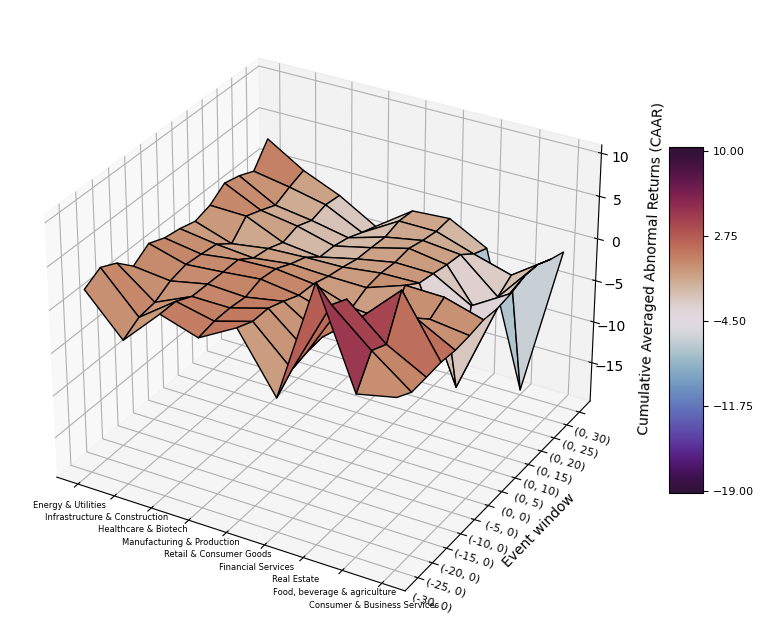

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Extract data
x = tabs_format1_clone.index

# Ensure x, y, and z are 2D grids for plot_surface
X, Y = np.meshgrid(range(len(sec_names)), range(len(x)))  # Numeric indices for plotting

# Retrieve Z values
Z = tabs_format1_clone.loc[:, (list(sec_names), 'CAAR')].values  # Transpose to match grid shapes


# Plotting
fig = plt.figure(figsize=(10, 9))
ax = fig.add_subplot(111, projection='3d')

# Create surface plot
surf = ax.plot_surface(X, Y, Z, cmap='twilight_shifted', edgecolor='k', vmin=np.min(Z), vmax=np.max(Z))

# Add a color bar
#fig.colorbar(surf, ax=ax)

cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, pad=0.05)  # Customize shrink and aspect for better fit
cbar.set_ticks(np.linspace(-19, 10, num=5))  # Set ticks for the color bar
cbar.ax.tick_params(labelsize=8)

# Add labels
ax.set_ylabel('Event window')
#ax.set_ylabel('Sectors')
ax.set_zlabel('Cumulative Averaged Abnormal Returns (CAAR)')
#ax.set_title('3D Surface Plot from MultiIndex DataFrame')

ax.set_yticks(range(len(x)))
ax.set_yticklabels(x, rotation=-17, fontsize=8)  # X-axis uses DataFrame index values -17

#ax.set_xticks([i + 0.5 for i in range(len(sec_names))])
ax.set_xticks(range(len(sec_names)))
ax.set_xticklabels(list(sec_names), rotation=0, fontsize=6)  # Y-axis uses
#ax.set_zticklabels(np.round(np.arange(np.min(Z), np.max(Z), step=0.2), 2), fontsize=8)

ax.tick_params(axis='x',labelleft=True, pad=1)
ax.tick_params(axis='y', labelleft=True, pad=1)  # Y-axis ticks closer to the axis
ax.tick_params(axis='z', pad=0)
#fig.subplots_adjust(left=0.15, right=1)
#fig.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.3)
fig.savefig(r'C:\caocao\2023\NetZero\data v2.0\report_7\plots\v1_twilight_shifted.png', dpi=300)
plt.show()


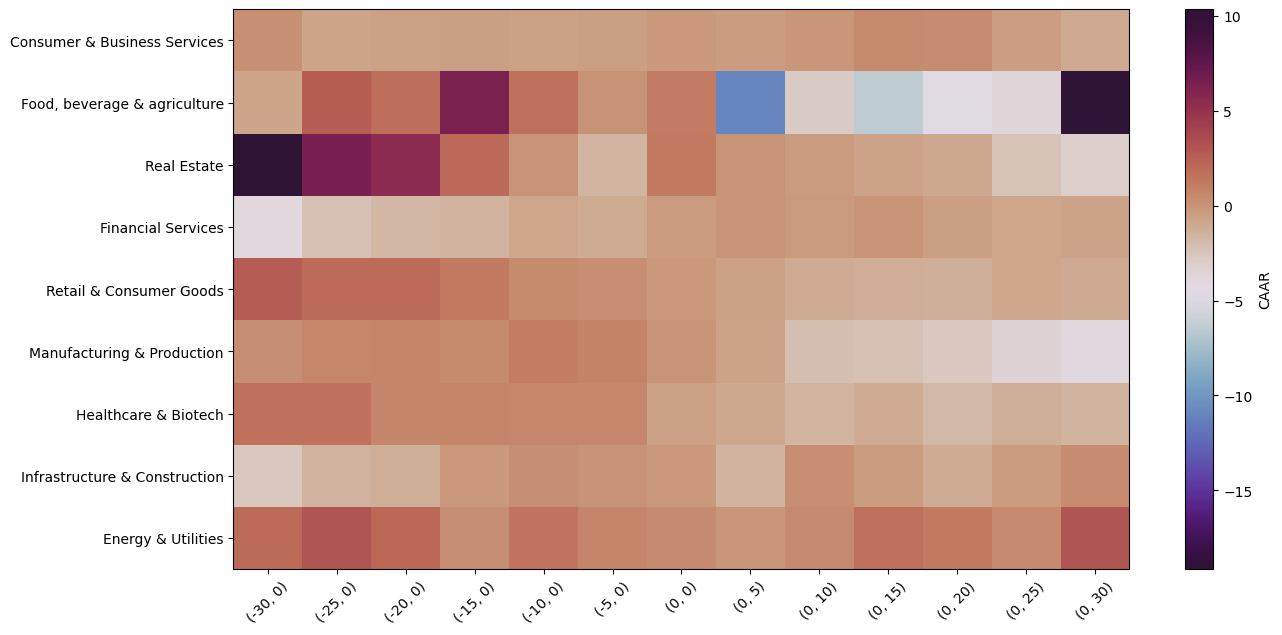

In [66]:
fig = plt.figure(figsize=(16, 8))
plt.pcolormesh(Y, X, Z, cmap='twilight_shifted', shading='auto')
plt.xticks(ticks=range(len(x)), labels=list(x), rotation=45)
plt.yticks(ticks=range(len(sec_names)), labels=sec_names, rotation=0)
plt.colorbar(label="CAAR")
#plt.title("2D Heatmap for Alignment Check")
fig.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.2)
plt.show()
fig.savefig(r'C:\caocao\2023\NetZero\data v2.0\report_7\plots\2d.png', dpi=300)

In [26]:
tabs_format1_clone

Manufacturing & Production            \
                                        CAR   t value   
(Event window, )                                        
(-30, 0)                          -0.575666 -0.006203   
(-25, 0)                          -0.296141 -0.003480   
(-20, 0)                          -0.087690 -0.001159   
(-15, 0)                          -0.332222 -0.005058   
(-10, 0)                           0.445445  0.008215   
(-5, 0)                            0.466061  0.011723   
(0, 0)                            -0.161429 -0.010025   
(0, 5)                            -0.798108 -0.020235   
(0, 10)                           -2.327632 -0.043738   
(0, 15)                           -2.489946 -0.038794   
(0, 20)                           -3.042613 -0.041379   
(0, 25)                           -3.710507 -0.045513   
(0, 30)                           -4.406867 -0.049504   

                 Infrastructure & Construction           Real Estate  \
                                           CAR   t value         CAR   
(Event window, )                                                       
(-30, 0)                             -2.127453 -0.059448    9.915809   
(-25, 0)                             -1.925718 -0.059158    5.872447   
(-20, 0)                             -1.348902 -0.046333    5.283969   
(-15, 0)                             -0.252656 -0.010031    1.720444   
(-10, 0)                              0.514036  0.024712    0.194871   
(-5, 0)                               0.110857  0.007330   -0.882801   
(0, 0)                               -0.139916 -0.023431    1.312508   
(0, 5)                               -1.417012 -0.096878    0.538036   
(0, 10)                               0.340601  0.017198    0.227017   
(0, 15)                              -0.373747 -0.015648   -0.273517   
(0, 20)                              -1.426389 -0.052126   -0.554409   
(0, 25)                              -0.500628 -0.016442   -1.668350   
(0, 30)                               0.141036  0.004242   -2.349188   

                           Energy & Utilities           Healthcare & Biotech  \
                   t value                CAR   t value                  CAR   
(Event window, )                                                               
(-30, 0)          0.339375           0.181910  0.006565             1.369673   
(-25, 0)          0.215690           1.404320  0.055586             1.406699   
(-20, 0)          0.227330           1.056204  0.046423             0.819695   
(-15, 0)          0.089777          -0.683187 -0.034326             0.644562   
(-10, 0)          0.012311           0.953982  0.058153             0.431784   
(-5, 0)          -0.077139           0.807702  0.061568             0.522187   
(0, 0)            0.282600           0.250732  0.047039            -0.653633   
(0, 5)            0.047294          -0.434693 -0.033293            -0.998763   
(0, 10)           0.014738          -0.161948 -0.009161            -1.699314   
(0, 15)          -0.014723           0.573180  0.026883            -1.183162   
(0, 20)          -0.026049          -0.086220 -0.003530            -1.884106   
(0, 25)          -0.070448          -1.513958 -0.055702            -1.416146   
(0, 30)          -0.090846           0.907967  0.030594            -1.791058   

                           Financial Services            \
                   t value                CAR   t value   
(Event window, )                                          
(-30, 0)          0.035560          -3.748157 -0.050157   
(-25, 0)          0.040235          -2.108852 -0.031025   
(-20, 0)          0.026334          -1.624462 -0.026795   
(-15, 0)          0.023828          -1.406411 -0.026775   
(-10, 0)          0.019350          -0.807724 -0.018696   
(-5, 0)           0.031793          -1.127376 -0.035874   
(0, 0)           -0.101108          -0.290621 -0.023298   
(0, 5)           -0.063072           0.029515  0.000966   
(0, 10)          -0.0

**Radar chart**   
Thống kê trong từng sector có bao nhiêu cái significant và non-significant

In [132]:
radar_chart_info

{'Manufacturing & Production': {'Significant': 54, 'Non-significant': 817},
 'Infrastructure & Construction': {'Significant': 10, 'Non-significant': 133},
 'Real Estate': {'Significant': 1, 'Non-significant': 77},
 'Energy & Utilities': {'Significant': 7, 'Non-significant': 123},
 'Healthcare & Biotech': {'Significant': 20, 'Non-significant': 253},
 'Financial Services': {'Significant': 46, 'Non-significant': 669},
 'Retail & Consumer Goods': {'Significant': 19, 'Non-significant': 423},
 'Food, beverage & agriculture': {'Significant': 0, 'Non-significant': 13},
 'Consumer & Business Services': {'Significant': 54, 'Non-significant': 921}}

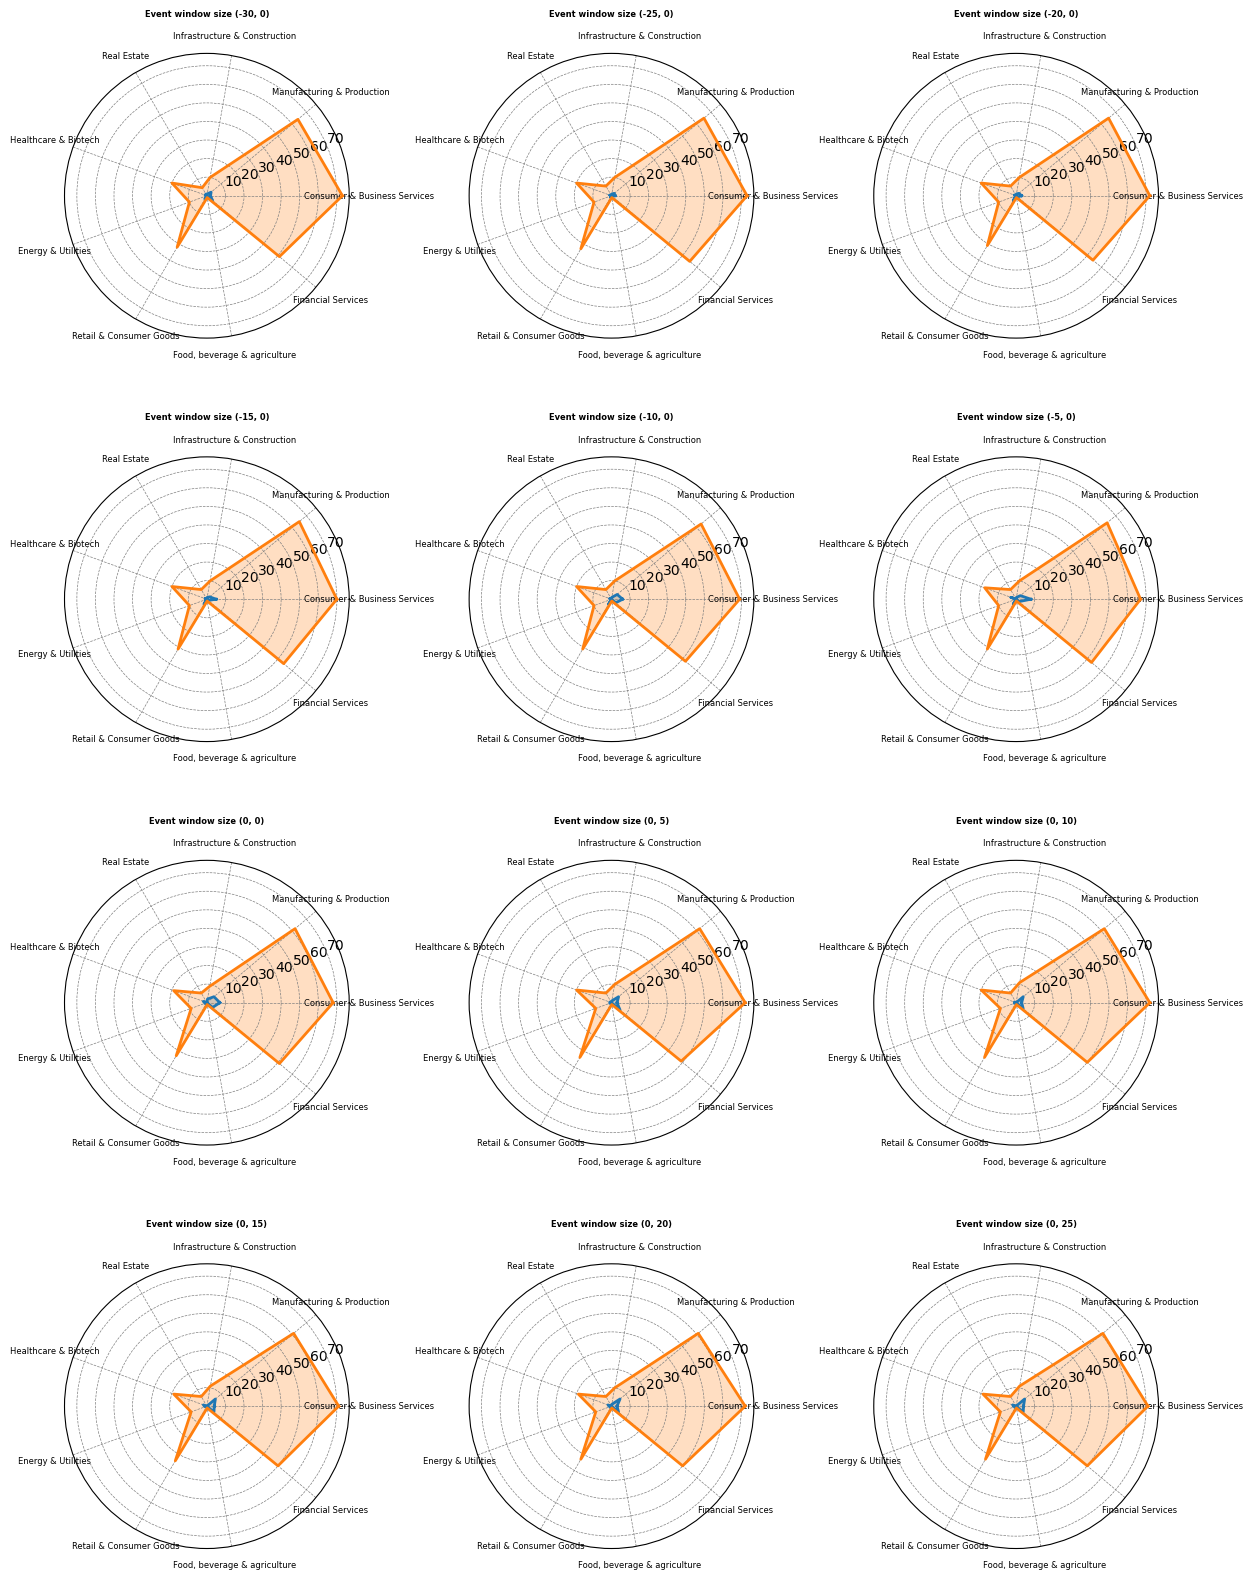

In [133]:
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 3, figsize=(12, 16), sharey=True, subplot_kw=dict(polar=True))
axs = axs.flatten()
for i, ax in enumerate(axs):
    radar_data = {}
    for sec in sec_names:
        radar_data[sec] = {'Significant':0, 'Non-significant':0}
    path = fr'C:\caocao\2023\NetZero\data v2.0\report_6\ver_{i+1}\logs.xlsx'
    log = pd.read_excel(path)
    for index, t_car in enumerate(log['t_car'].values):
        if abs(t_car)>=1.96:
            radar_data[log.iloc[index,1]]['Significant']+=1
        else:
            radar_data[log.iloc[index,1]]['Non-significant']+=1
# Data for the radar chart
# metrics = {
#     'Manufacturing & Production': {'Significant': 4, 'Non-significant': 3},
#     'Infrastructure & Construction': {'Significant': 1, 'Non-significant': 2},
#     'Real Estate': {'Significant': 2, 'Non-significant': 3},
#     'Energy & Utilities': {'Significant': 2, 'Non-significant': 5},
#     'Healthcare & Biotech': {'Significant': 2, 'Non-significant': 0}
# }
    metrics_df = pd.DataFrame(radar_data).T

    # Categories (A, B, C) and metrics (Positive, Negative, Zero)
    categories = metrics_df.index.tolist()
    num_vars = len(categories)

    # Angles for the radar chart
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Close the radar chart loop

    # Radar chart setup
    #fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    # Plot each metric on the radar chart
    for label in metrics_df.columns:
        values = metrics_df[label].tolist()
        values += values[:1]  # Close the loop for each metric
        ax.plot(angles, values, label=label, linewidth=2, linestyle='solid')
        ax.fill(angles, values, alpha=0.25)

    # Customize the radar chart
    ax.set_xticks(angles[:-1])
    ax.set_title(f"Event window size {str(settings[i]['event window'])}", y=1.1, fontsize=6, fontweight="bold")
    #ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=8)
    ax.grid(color='gray', linestyle='--', linewidth=0.5) 
    ax.set_xticklabels(categories, fontsize=6)
fig.tight_layout(pad=-1)
fig.savefig(r'C:\caocao\2023\NetZero\data v2.0\report_6\plots\radar.png', dpi=300)
plt.show()

**Bar chart**

In [11]:
dt = pd.read_excel(r'C:\caocao\2023\NetZero\data v2.0\report_7\countries_shink.xlsx', index_col=0)

In [12]:
dt

,Event window,Taiwan,Switzerland,Sweden,Denmark,China,Canada,Austria,Brazil,United States of America,...,United Kingdom,Saudi Arabia,Norway,Italy,Finland,South Korea,Japan,Germany,Malaysia,Thailand
0,"(-30, 0)",1.329313,4.897179,-2.415063,-4.975383,14.453630,4.899374,-12.947352,5.265099,-0.439778,...,-1.321654,0.746200,3.631562,3.983645,-1.541002,-7.884104,1.766915,-6.248068,4.773227,5.984951
1,"(-25, 0)",2.845434,2.840725,-1.521587,-2.629735,10.456545,5.008921,-9.449334,1.105810,0.188492,...,-1.764904,-0.815944,2.751844,6.417147,-3.157078,-2.217717,0.801513,-3.870686,-2.139162,-2.841201
2,"(-20, 0)",2.960822,1.131845,-1.013320,-4.606461,9.766691,4.918013,-7.228465,0.675574,0.261357,...,-0.549030,0.885053,-1.032262,4.056450,-1.952395,-0.026677,0.071081,-2.978812,-0.987881,2.536433
3,"(-15, 0)",0.221106,1.620567,-1.469821,-3.026718,3.947883,4.896769,-3.590553,-4.461724,0.157506,...,0.469284,6.534780,-0.139584,1.563399,5.993697,-2.444536,-1.014790,-1.913710,-2.340933,1.866188
4,"(-10, 0)",0.543877,1.739508,-0.984456,-1.190876,6.427871,4.351497,-2.893646,-2.645752,0.696414,...,0.112839,3.818261,2.957894,1.517895,0.908397,-5.532781,-1.132585,-0.001659,-0.610313,0.759443
5,"(-5, 0)",-1.514488,0.596830,-0.601635,-0.733605,2.260120,0.949082,0.349518,0.197938,0.469937,...,-0.168282,1.218962,0.809036,0.568328,1.927327,-3.562400,-1.156020,-0.260292,-1.054963,6.008512
6,"(0, 0)",-0.071560,-0.814769,-0.133711,-0.399852,1.966322,-0.153382,0.166189,0.566973,-0.371762,...,-0.317913,0.696180,0.197501,-0.466812,-0.116403,-2.148008,-0.172640,-0.225306,1.069820,1.285872
7,"(0, 5)",-3.060787,-3.548160,-1.593073,0.008364,-2.995085,0.084152,-0.614385,0.251572,-0.441905,...,-0.316283,-2.665653,2.152015,-2.475566,-0.707082,-4.345628,-0.543048,1.851879,-1.985197,1.219828
8,"(0, 10)",-6.836524,-3.289468,-2.383409,0.457178,-5.219441,-0.525387,1.135094,-1.676210,-0.137129,...,-1.074641,-3.218636,-0.437796,-1.405972,-3.349902,-3.430389,0.029461,0.920564,-6.456202,-5.602593
9,"(0, 15)",-7.263550,-3.989892,-1.437224,-1.604447,-0.433747,-1.393451,5.155838,-4.220333,0.173217,...,-0.458632,-4.739401,1.375307,-2.786731,-5.656497,-5.938968,-0.215793,3.018587,-3.904749,1.913810


In [54]:
dt[1:2].values[0][1:]

array([4.122277522936789, 4.935888895864406, 9.544444817836292,
       -14.50223583141715, 8.583171996029087, 2.72577853843022,
       -1.739631968692282, -1.100350031564495, -0.6340469913761618,
       -5.31861925846562, 2.010419185344038, 1.055552706410074,
       -0.3500911162793727, -1.849161790504136, -0.2398528033749127,
       -1.555001431908773, -9.989765413200288, -3.559870199751334,
       -1.223013404594661, 2.612189663986872, 0.4630098416131544,
       4.122495481843038, -2.012018606828105, -3.095229218270285,
       -6.388341604389784, -12.3327624472905, 3.003119633175612,
       -4.653673179890846, 0.4582241437235189], dtype=object)

In [59]:
dt['Event window']

0     (-30, 0)
1     (-25, 0)
2     (-20, 0)
3     (-15, 0)
4     (-10, 0)
5      (-5, 0)
6       (0, 0)
7       (0, 5)
8      (0, 10)
9      (0, 15)
10     (0, 20)
11     (0, 25)
12     (0, 30)
Name: Event window, dtype: object

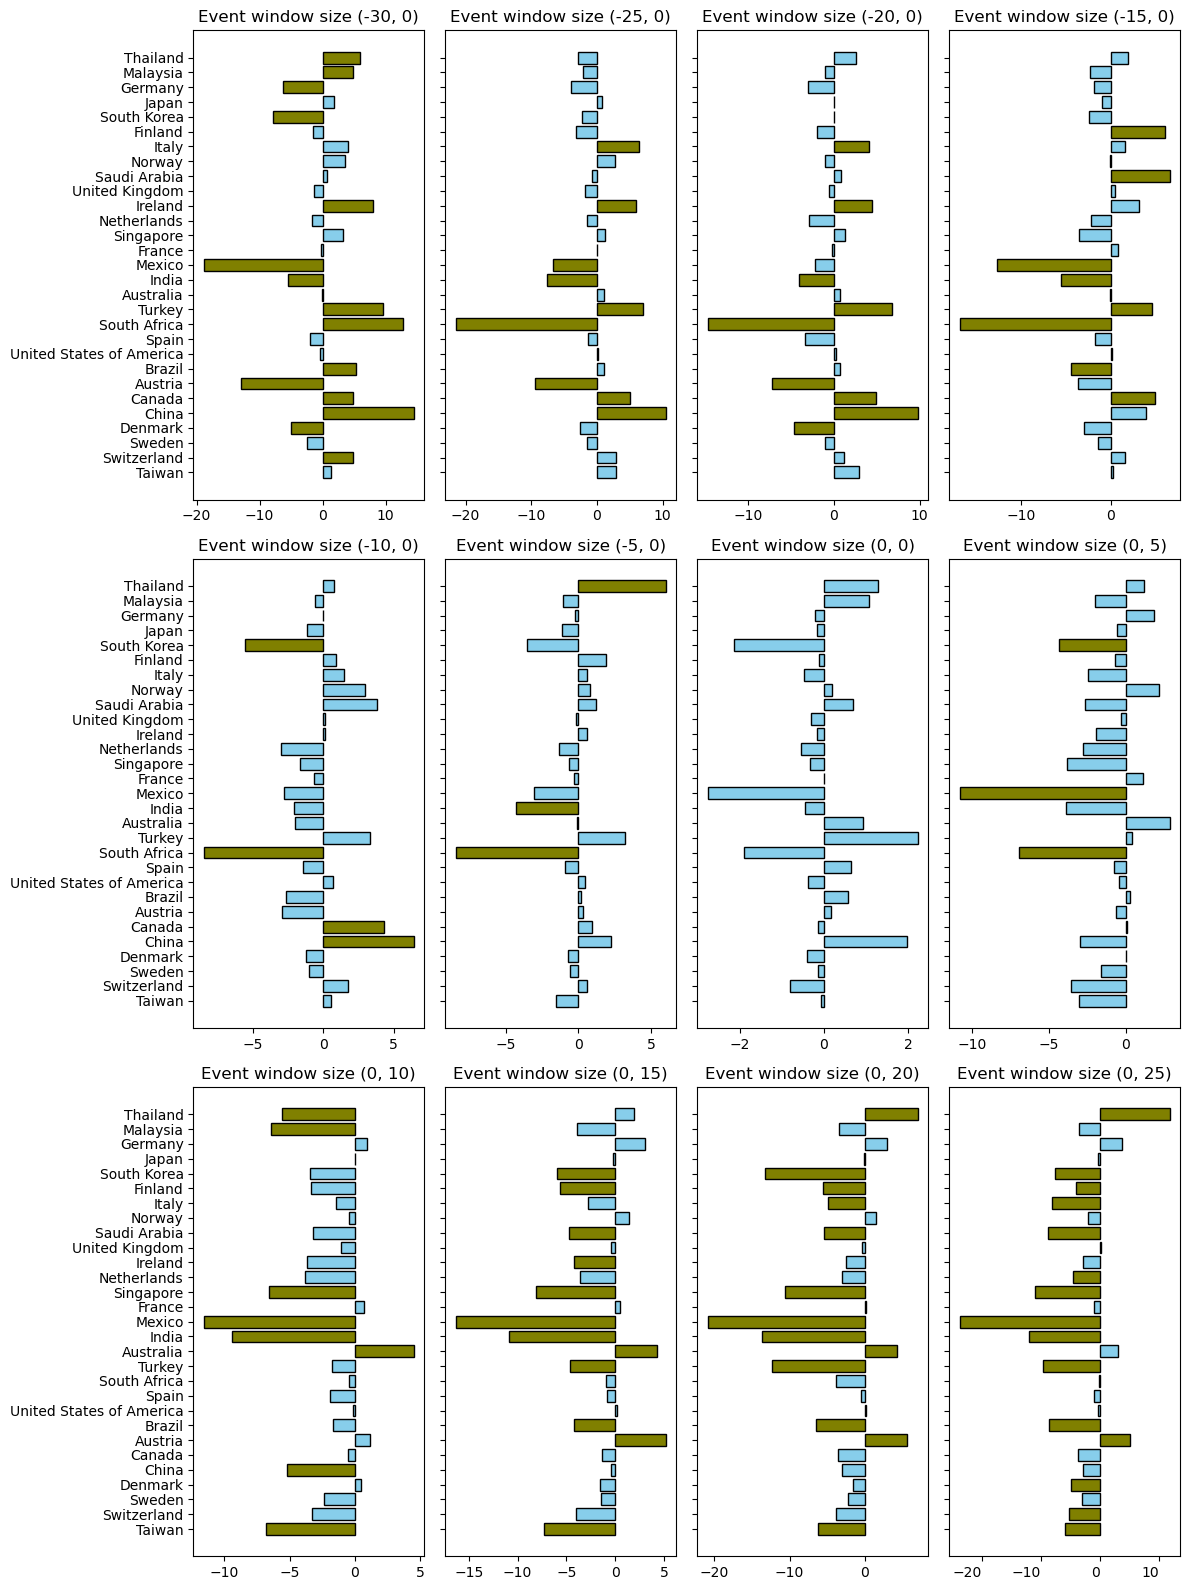

In [13]:
fig, axs = plt.subplots(3, 4, figsize=(12, 16), sharey=True)
axs = axs.flatten()
for i, ax in enumerate(axs):
    colors = ['olive' if abs(value) >=4 else 'skyblue' for value in dt[i:i+1].values[0][1:]]
    ax.barh(dt.columns[1:], dt[i:i+1].values[0][1:], color=colors, edgecolor='black')
    ax.set_title(f'Event window size {dt["Event window"][i]}')

plt.xticks(fontsize=10, ha='right')
plt.yticks(fontsize=10, ha='right')

plt.tight_layout()
plt.savefig(r'C:\caocao\2023\NetZero\data v2.0\report_7\plots\bar_countries.png', dpi=300, bbox_inches='tight')
plt.show()

In [130]:
dt2 = pd.read_excel(r'C:\caocao\2023\NetZero\data v2.0\report_6\countries_shink2.xlsx', index_col=0)

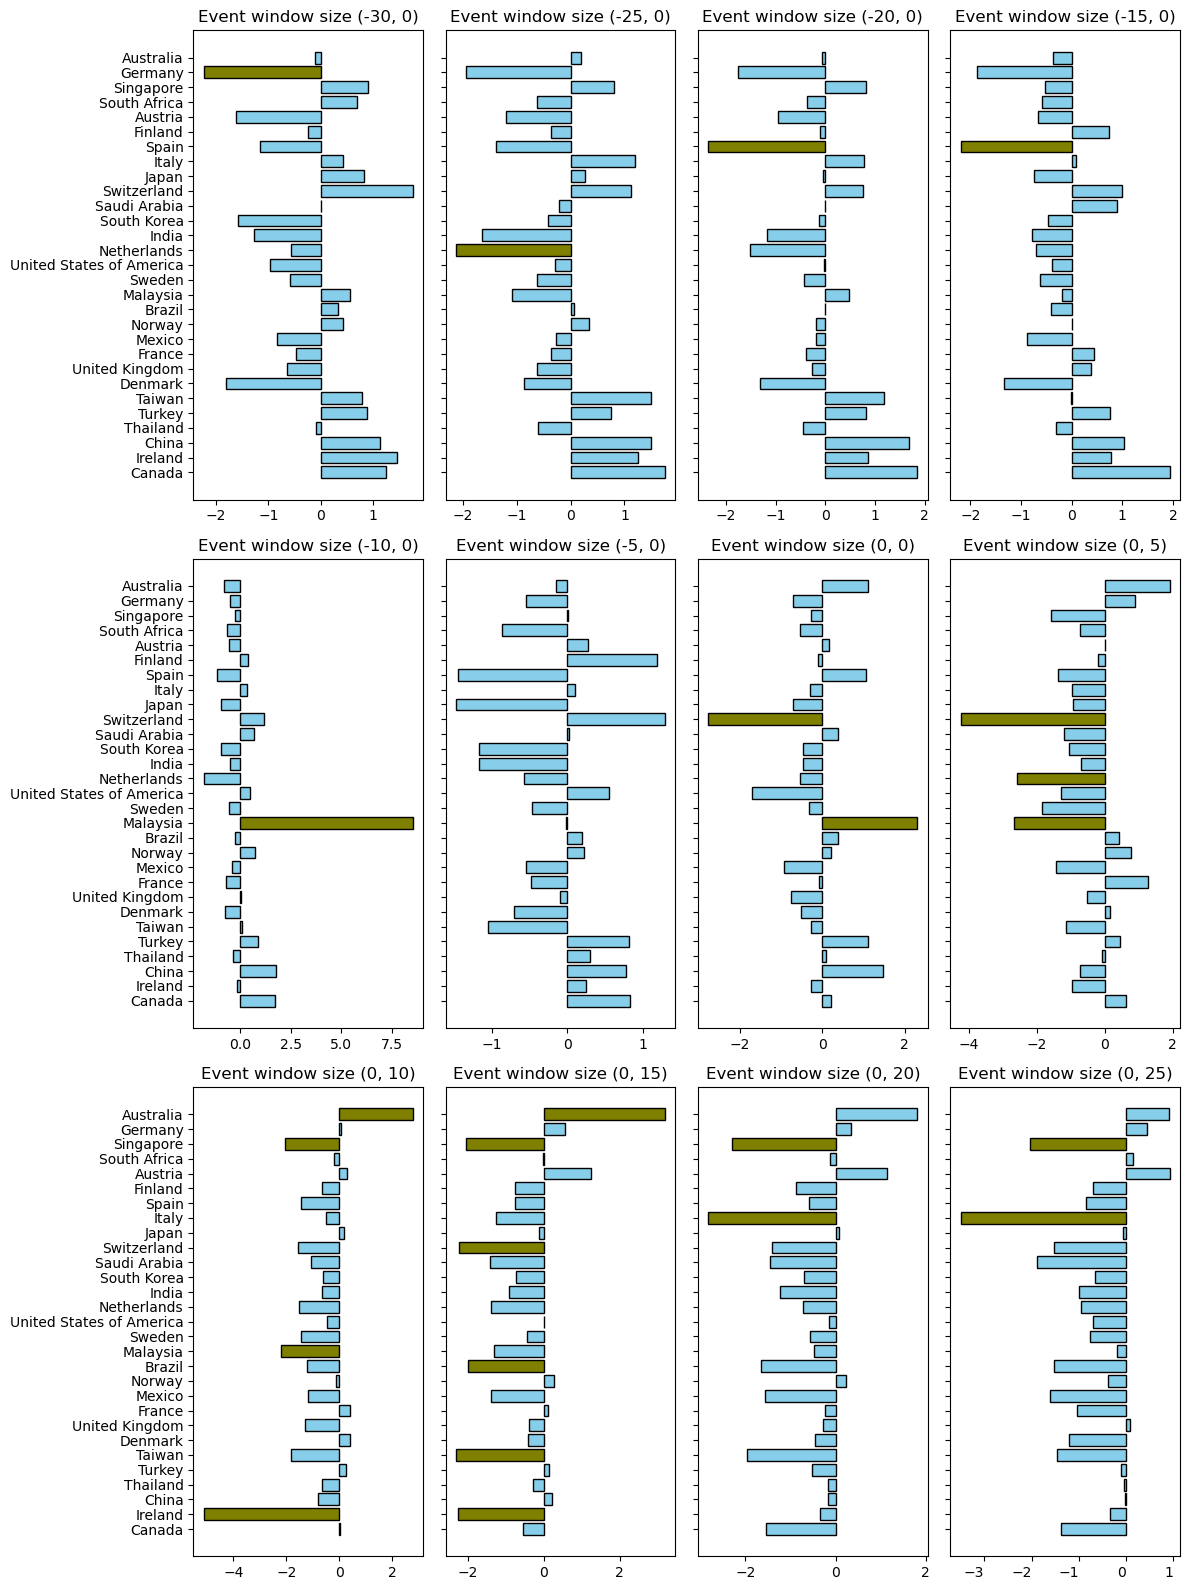

In [131]:
fig, axs = plt.subplots(3, 4, figsize=(12, 16), sharey=True)
axs = axs.flatten()
for i, ax in enumerate(axs):
    colors = ['olive' if abs(value) >=1.96 else 'skyblue' for value in dt2[i:i+1].values[0][1:]]
    ax.barh(dt2.columns[1:], dt2[i:i+1].values[0][1:], color=colors, edgecolor='black')
    ax.set_title(f'Event window size {dt["Event window"][i]}')

plt.xticks(fontsize=10, ha='right')
plt.yticks(fontsize=10, ha='right')

plt.tight_layout()
plt.savefig(r'C:\caocao\2023\NetZero\data v2.0\report_6\plots\bar_countries_t_test.png', dpi=300, bbox_inches='tight')
plt.show()

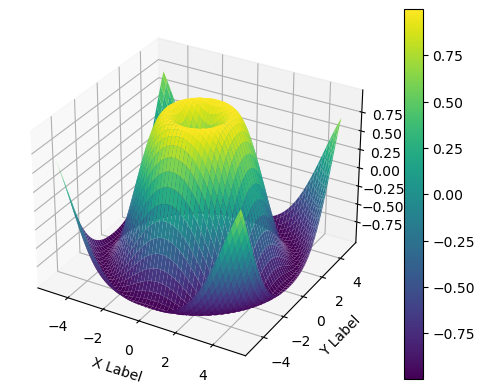

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Data for a 3D surface
X = sec_names
Y = tabs_format1[('Event window', '')]
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X**2 + Y**2))
Z = tabs_format1.loc[]

# Plot a 3D surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis')

# Add a color bar
fig.colorbar(surf)

# Add labels
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Show plot
plt.show()

In [158]:
import pandas as pd

# Create a DataFrame with multi-level columns
data = {
    ('MainColumn', 'SubColumn1'): [1, 2, 3],
    ('MainColumn', 'SubColumn2'): [4, 5, 6],
    ('OtherColumn', ''): [7, 8, 9]
}

# Convert to a DataFrame
df = pd.DataFrame(data)

# Set column names to multi-index
df.columns = pd.MultiIndex.from_tuples(df.columns)

# Save to Excel
df.to_excel("multi_index_columns.xlsx")

print("DataFrame saved to multi_index_columns.xlsx")


C:\caocao\2023\NetZero\data v2.0\report\ver_1


In [159]:
full_path = os.path.join(a, 'subfolder')
print(full_path)

C:\caocao\2023\NetZero\data v2.0\report\ver_1\subfolder


In [125]:
setting={'event window':(-5, 5), 'estimation window': 200}
with open(r'C:\caocao\2023\NetZero\data v2.0\report\v_2\readme1.txt', 'w+') as f:
    f.write(str(setting))
    
import os

# Specify the directory name
directory_name = "New_Folder"

# Create the directory
if not os.path.exists(directory_name):
    os.makedirs(directory_name)

# Verify creation by checking if the directory exists
os.path.exists(directory_name)


In [3]:
path = r'C:\caocao\2023\NetZero\data v2.0\stocks_markets\0010.HK.csv'
stock = Stock(path, event_window = (-20, 20), estimation_window = 200)
status, message = stock.get_selected_data()
stock.calculate_actual_return()
stock.calculate_expected_return()
stock.calculate_abnormal_return()
stock.get_cumulative_abnormal_return()
print(stock.estimation_data.head())
print(stock.event_window_data.head())
test = pd.concat([stock.estimation_data.head(), stock.event_window_data.head()], ignore_index=True)

   index       Date     Stock   Market joined date  actual_return_stock  \
0     83 2021-07-29  2.470979  7207.48  2023-01-19                  NaN   
1     84 2021-07-30  2.444673  7262.38  2023-01-19            -1.064585   
2     85 2021-08-13  2.520944  7641.92  2023-01-19             3.119862   
3     86 2021-08-16  2.530800  7568.14  2023-01-19             0.390978   
4     87 2021-08-17  2.561536  7360.03  2023-01-19             1.214475   

   actual_return_market  
0                   NaN  
1              0.761709  
2              5.226110  
3             -0.965464  
4             -2.749817  
   index       Date     Stock   Market joined date  actual_return_stock  \
0    283 2022-11-25  1.689492  6513.23  2023-01-19             2.898226   
1    284 2022-11-28  1.671402  6490.93  2023-01-19            -1.070736   
2    285 2022-11-29  1.690076  6592.78  2023-01-19             1.117268   
3    286 2022-11-30  1.754229  6584.32  2023-01-19             3.795853   
4    287 2022-12-1

In [11]:
print(test)

   index       Date     Stock   Market joined date  actual_return_stock  \
0     83 2021-07-29  2.470979  7207.48  2023-01-19                  NaN   
1     84 2021-07-30  2.444673  7262.38  2023-01-19            -1.064585   
2     85 2021-08-13  2.520944  7641.92  2023-01-19             3.119862   
3     86 2021-08-16  2.530800  7568.14  2023-01-19             0.390978   
4     87 2021-08-17  2.561536  7360.03  2023-01-19             1.214475   
5    283 2022-11-25  1.689492  6513.23  2023-01-19             2.898226   
6    284 2022-11-28  1.671402  6490.93  2023-01-19            -1.070736   
7    285 2022-11-29  1.690076  6592.78  2023-01-19             1.117268   
8    286 2022-11-30  1.754229  6584.32  2023-01-19             3.795853   
9    287 2022-12-13  1.865264  6593.05  2023-01-19             6.329558   

   actual_return_market  expected_return  abnormal_return  
0                   NaN              NaN              NaN  
1              0.761709              NaN              

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 10 non-null     int64         
 1   Date                  10 non-null     datetime64[ns]
 2   Stock                 10 non-null     float64       
 3   Market                10 non-null     float64       
 4   joined date           10 non-null     datetime64[ns]
 5   actual_return_stock   8 non-null      float64       
 6   actual_return_market  8 non-null      float64       
dtypes: datetime64[ns](2), float64(4), int64(1)
memory usage: 692.0 bytes


In [8]:
import pandas as pd

# Sample DataFrame 1
data1 = {
    'A': ['A0', 'A1', 'A2', 'A3'],
    'B': ['B0', 'B1', 'B2', 'B3'],
}

df1 = pd.DataFrame(data1)

# Sample DataFrame 2
data2 = {
    'A': ['A4', 'A5', 'A6', 'A7'],
    'B': ['B4', 'B5', 'B6', 'B7'],
    'C': ['C4', 'B5', 'B6', 'B7']
}

df2 = pd.DataFrame(data2)

# Concatenating DataFrames
result = pd.concat([df1, df2], ignore_index=True)  # ignore_index reindexes the concatenated DataFrame

print(result)


    A   B    C
0  A0  B0  NaN
1  A1  B1  NaN
2  A2  B2  NaN
3  A3  B3  NaN
4  A4  B4   C4
5  A5  B5   B5
6  A6  B6   B6
7  A7  B7   B7


In [30]:
file = r'C:\caocao\2023\NetZero\data v2.0\close_values_v2\0010.HK.csv'
stock = Stock(file, event_window = (-5, 5), estimation_window = 200)
status, message = stock.get_selected_data()
if status:
    stock.calculate_actual_return()
    stock.calculate_expected_return()
    stock.calculate_abnormal_return()
    stock.do_one_sample_Ttest_abnormal_return()
    print(f't-statistic = {stock.do_t_statistic()}')
    print(stock.event_window_data.head())
    print(stock.index)
else:
    print('Error')
    print(message)

t-statistic = 1.7863538267993744
   index       Date     Stock       Market joined date  actual_return_stock  \
0    233 2023-01-12  1.790334  3163.449951  2023-01-19            -0.000853   
1    234 2023-01-13  1.803002  3195.310059  2023-01-19             0.007076   
2    235 2023-01-16  1.818042  3227.592041  2023-01-19             0.008342   
3    236 2023-01-17  1.826998  3224.239990  2023-01-19             0.004926   
4    237 2023-01-18  1.814789  3224.409912  2023-01-19            -0.006682   

   actual_return_market  expected_return  abnormal_return  
0              0.000509        -0.000232        -0.000622  
1              0.010071         0.005218         0.001858  
2              0.010103         0.005236         0.003106  
3             -0.001039        -0.001114         0.006040  
4              0.000053        -0.000492        -0.006191  
0010.HK


In [167]:
data = {}
c=[]
t = []
p=[]
d=[]
g=[]
for k, v in log.items():
    if type(v)==tuple:
        t.append(v[0])
        p.append(v[1])
        c.append(k[0])
        d.append(k[2])
        g.append(k[1])
    else:
        t.append(v)
        p.append('--')
        c.append(k[0])
        d.append(k[2])
        g.append(k[1])
data = {'Mã':c, 'Group': g, 'Joined Date': d, 'T-statistic': t, 'p-value': p}
report = pd.DataFrame(data)
report.to_excel(r'C:\caocao\2023\NetZero\data v2.0\report\single_analysis.xlsx')

**Tính theo nhóm**

In [192]:
group = pd.read_excel(r'C:\caocao\2023\NetZero\data v2.0\indices_v2.xlsx')
empty = pd.Series([0 for i in range(11)])
group['Group Sector'] = group['Group Sector'].str.strip()
index_sector = {}
for i in range(len(group)):
    index_sector[group.loc[i, 'Code']] = group.loc[i, 'Group Sector']
sectors = set(group['Group Sector'].values)
sector_dicts = {key: [empty.copy(), 0] for key in sectors}

abnormal_folder = r'C:\caocao\2023\NetZero\data v2.0\report\abnormal_v2'
sector_folder = r'C:\caocao\2023\NetZero\data v2.0\report\sectors'
files = os.listdir(abnormal_folder)
report = {}
for f in files:
    filename = f'{abnormal_folder}\{f}'
    d = pd.read_csv(filename)
    sector = index_sector[f[:-4]]
    sector_dicts[sector][0]+=d.abnormal_return
    sector_dicts[sector][1]+=1
    
for k, v in sector_dicts.items():
    sector_dicts[k][0] = sector_dicts[k][0]/sector_dicts[k][1]
    t_stat, p_value = stats.ttest_1samp(sector_dicts[k][0].values, 0)
    report[k] = {'t-statistic': t_stat, 'p-value': p_value}
    sector_dicts[k][0].to_csv(f'{sector_folder}\{k}.csv', header=False)

# lưu kết quả statistic
report = pd.DataFrame(report)
report = report.T
report.to_excel(r'C:\caocao\2023\NetZero\data v2.0\report\sectors\sector_statistic.xlsx')

{'Financial Services': [0    -0.101808
1    -0.215522
2     0.004454
3     0.176365
4    -0.299716
5    -0.094190
6    -0.053790
7    -0.095937
8     0.115770
9     0.117167
10    0.121456
dtype: float64, 56], 'Retail & Consumer Goods': [0     0.018936
1    -0.065287
2     0.040702
3     0.040588
4     0.102939
5    -0.107450
6    -0.164486
7     0.033355
8    -0.092522
9     0.025438
10   -0.078437
dtype: float64, 42], 'Energy & Utilities': [0     0.012448
1    -0.039392
2    -0.076277
3     0.079679
4     0.061513
5     0.039016
6     0.048930
7     0.009047
8    -0.036356
9    -0.015753
10   -0.064164
dtype: float64, 11], 'Manufacturing & Production': [0    -0.015935
1     0.246753
2     0.167101
3     0.141318
4     0.082106
5    -0.243684
6    -0.085973
7    -0.038675
8     0.132553
9    -0.213629
10   -0.114863
dtype: float64, 73], 'Healthcare & Biotech': [0     0.046386
1    -0.001755
2    -0.040401
3     0.089246
4     0.151320
5    -0.134276
6    -0.075903
7     0.016135
8    

In [57]:
indices = pd.read_excel(r'C:\caocao\2023\NetZero\data v2.0\indices_v2.xlsx')
indices.head()

,Code,FullName,Type,Country,Region,Sector,Group Sector,Date Joined
0,IDEXY,INDITEX,Company,Spain,Western European and Others Group (WEOG),Apparel,Retail & Consumer Goods,28-11-2018
1,ADDYY,ADIDAS AG,Company,Germany,Western European and Others Group (WEOG),Apparel,Retail & Consumer Goods,27-11-2018
2,PRTP.SA,KERING SA,Company,France,Western European and Others Group (WEOG),Apparel,Retail & Consumer Goods,30-12-2018
3,PVH,PVH CORP,Company,United States of America,Western European and Others Group (WEOG),Apparel,Retail & Consumer Goods,12-08-2018
4,TGT,TARGET CORPORATION,Company,United States of America,Western European and Others Group (WEOG),Apparel,Retail & Consumer Goods,13-11-2018


In [62]:
sorted_df_asc = indices.sort_values(by='Country', ascending=True)

In [64]:
sorted_df_asc.to_excel(r'C:\caocao\2023\NetZero\data v2.0\indices_sorted.xlsx', index=False)

## CÁC BÁO CÁO

**Xuất ra các bảng biểu theo mẫu**

**Figure 01 - ABNORMAL RETURN BY SECTORS**
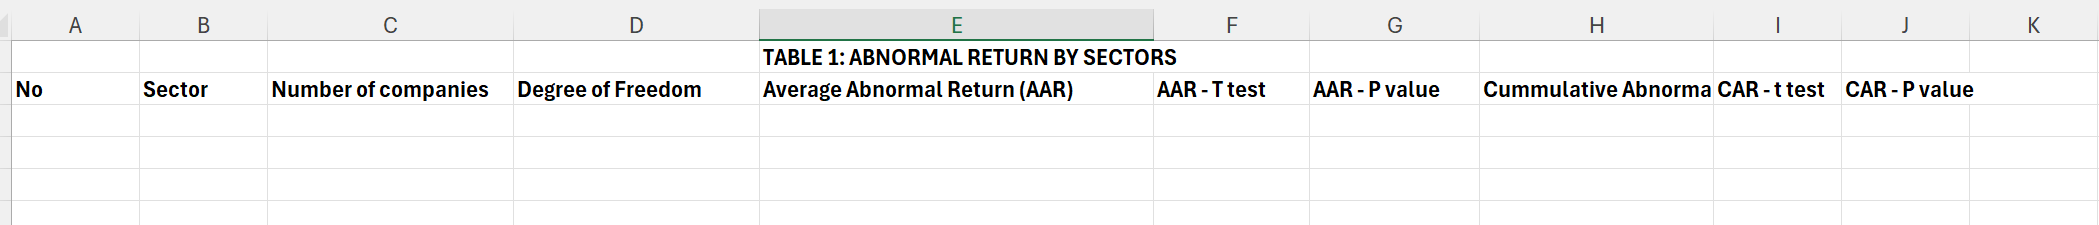

**Figure 02 - ABNORMAL RETURN BY COUNTRIES**

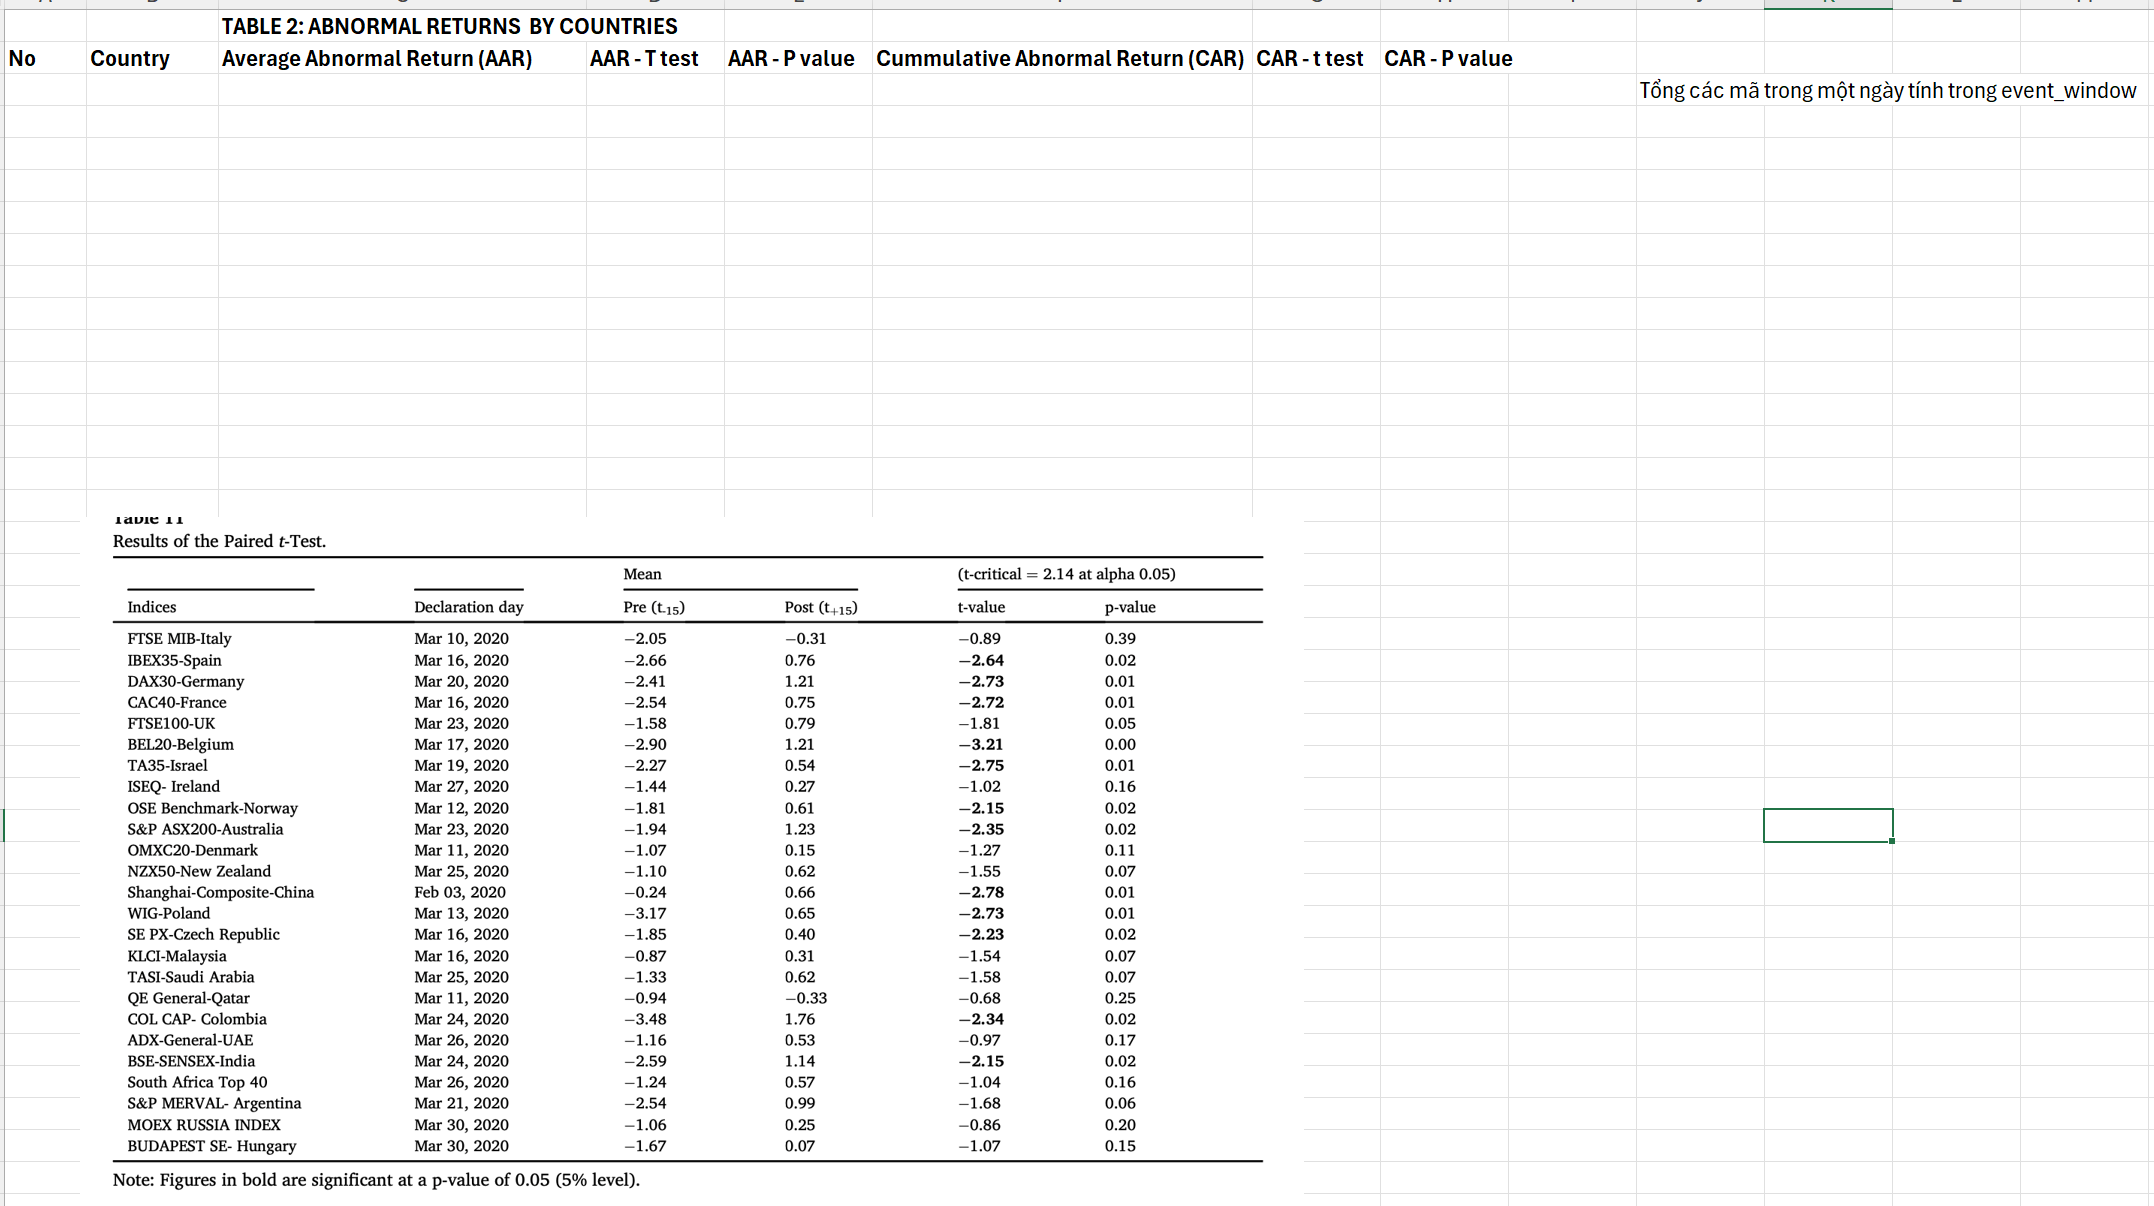

**Figure 03 - MARKET'S PRE AND POST EVENT ABNORMAL RETURNS**

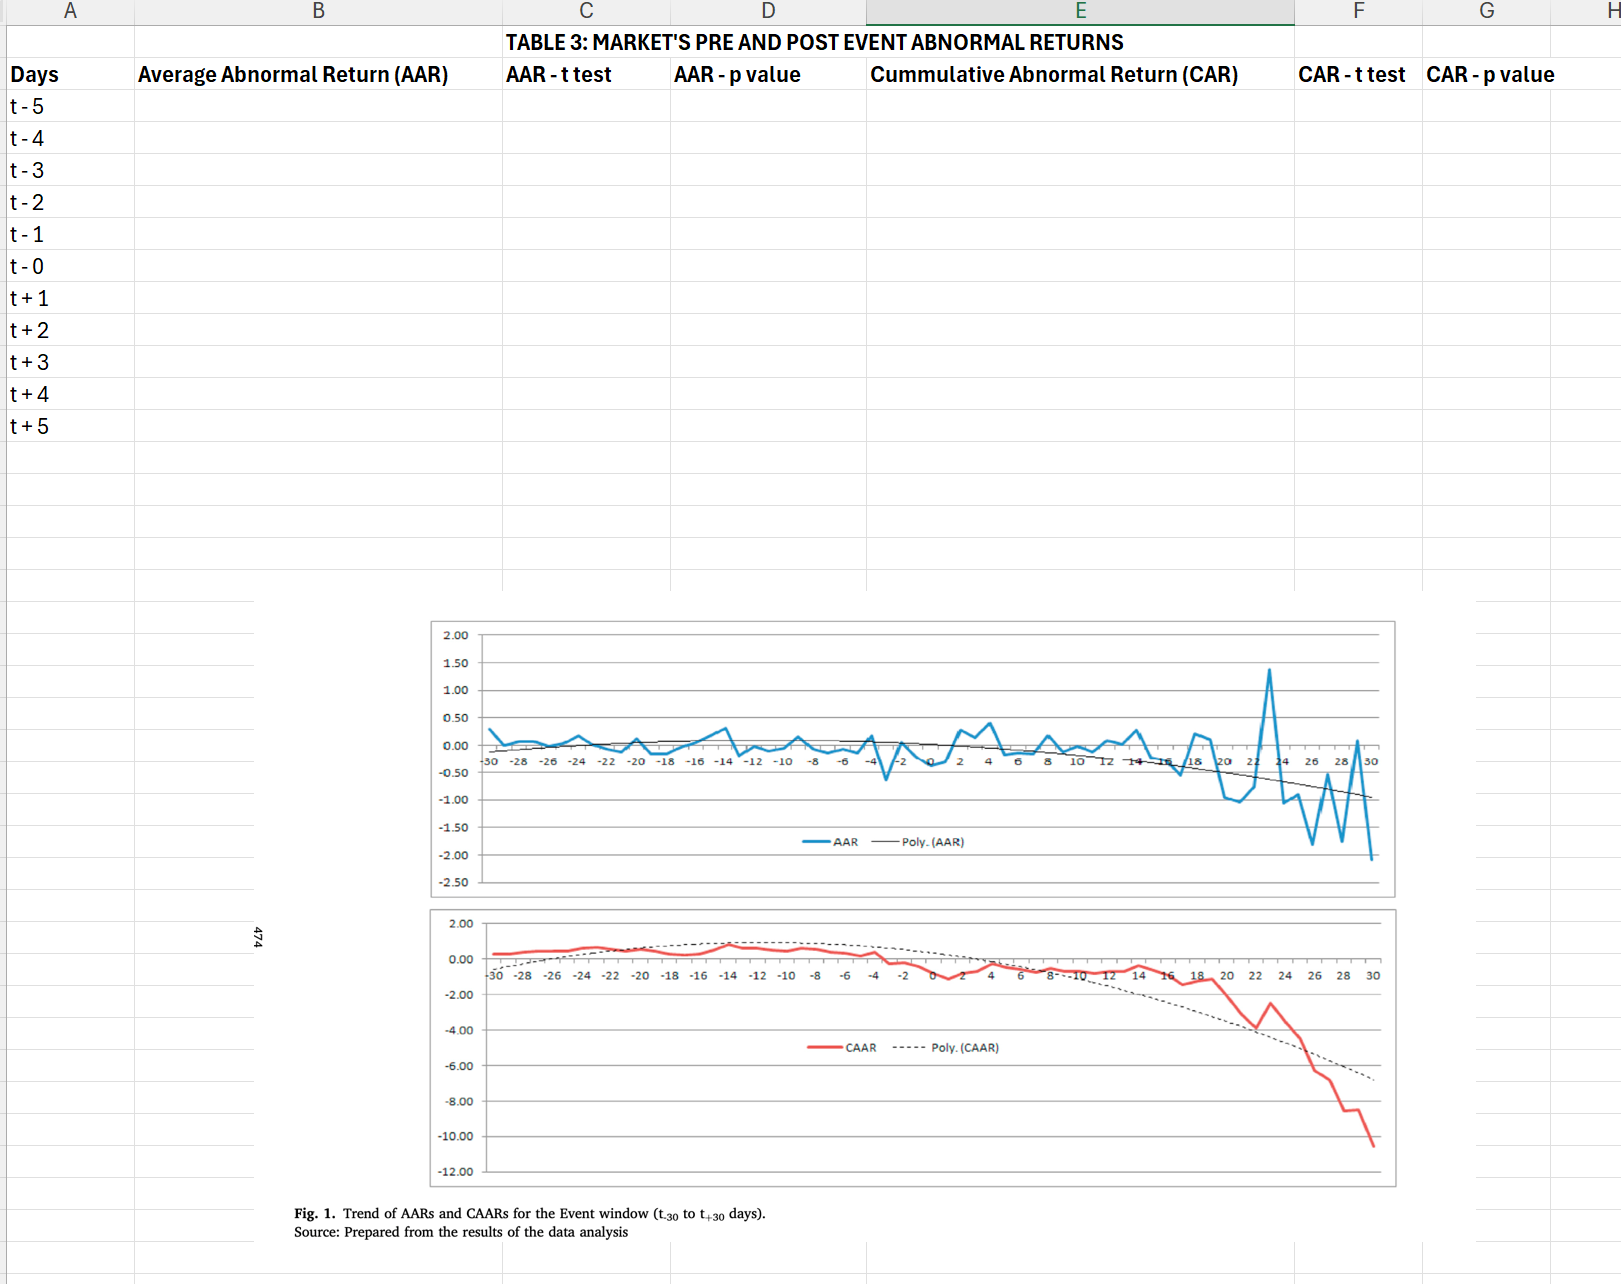

**Figure 04 - AARs AND CAARs AROUND EVENT DAY**

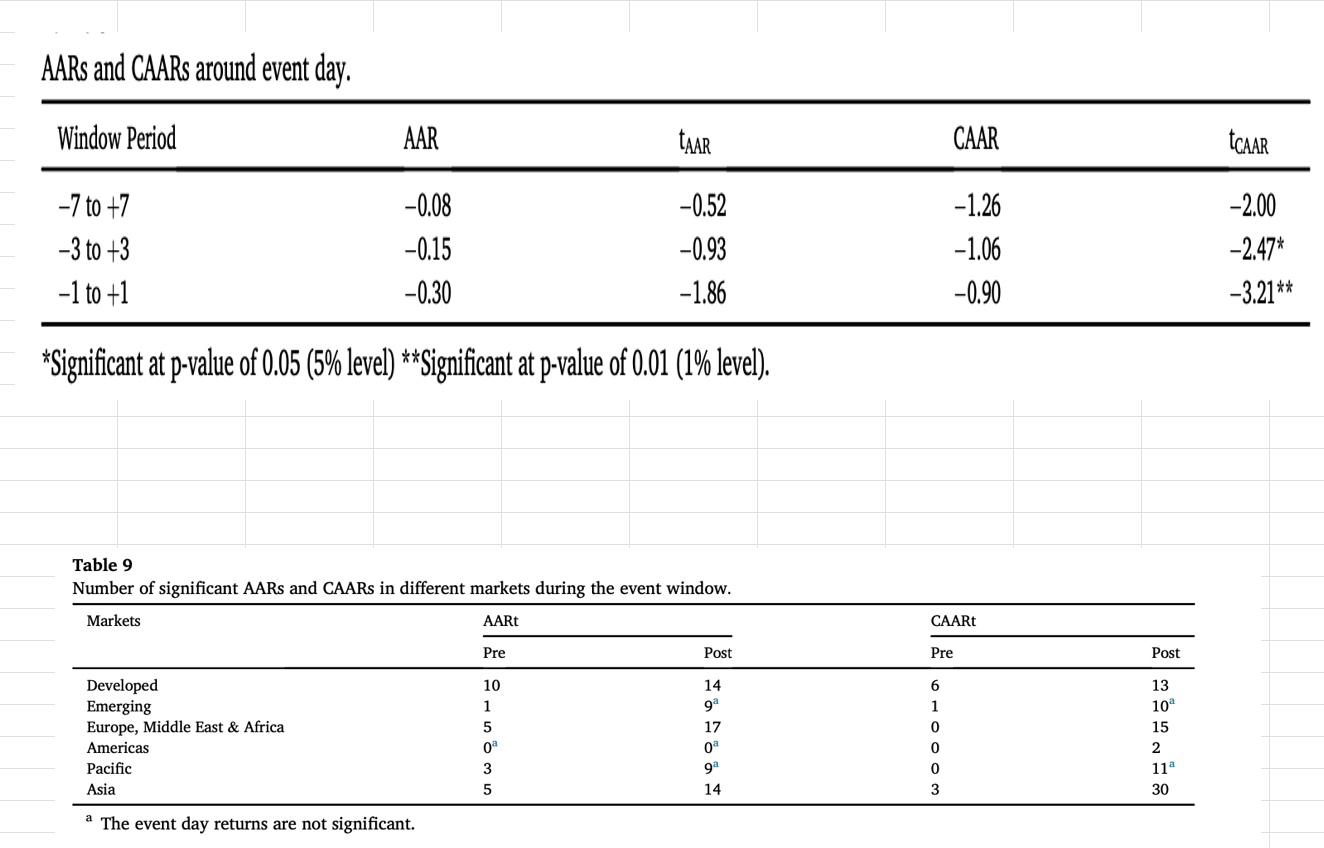

**Appendix**

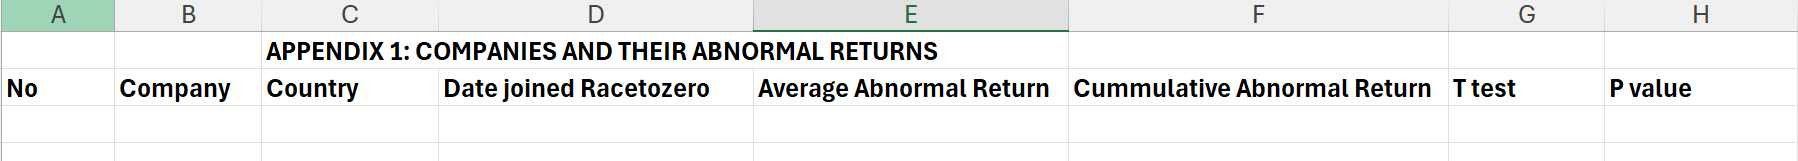

In [109]:
a = pd.DataFrame({'a': [3, 2, 5], 'b': [4, 5,3]})
a

,a,b
0,3,4
1,2,5
2,5,3


In [110]:
a['c'] = a['a']
a

,a,b,c
0,3,4,3
1,2,5,2
2,5,3,5


In [111]:
a.loc[0, 'a'] = 9
a

,a,b,c
0,9,4,3
1,2,5,2
2,5,3,5


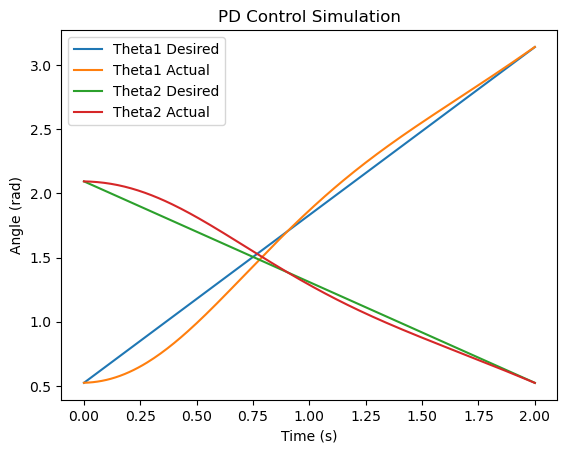

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
m1, m2 = 8, 8  # Masses
l1, l2 = 0.8, 0.8  # Link lengths
kp, kd = 100, 20  # PD gains
tf = 2  # Final time
dt = 0.01  # Time step

# Time vector
time = np.arange(0, tf + dt, dt)

# Desired trajectories (linear blend)
theta1_d = np.linspace(np.radians(30), np.radians(180), len(time))
theta2_d = np.linspace(np.radians(120), np.radians(30), len(time))
theta1_dot_d = np.gradient(theta1_d, dt)
theta2_dot_d = np.gradient(theta2_d, dt)

# Initialize state variables
theta1, theta2 = np.radians(30), np.radians(120)
theta1_dot, theta2_dot = 0, 0

# Simulation loop
theta1_vals, theta2_vals = [], []
for i in range(len(time)):
    # Errors
    e1, e1_dot = theta1_d[i] - theta1, theta1_dot_d[i] - theta1_dot
    e2, e2_dot = theta2_d[i] - theta2, theta2_dot_d[i] - theta2_dot

    # PD control torques
    tau1 = kp * e1 + kd * e1_dot
    tau2 = kp * e2 + kd * e2_dot

    # Simple dynamics (ignore coupling for simplicity)
    theta1_ddot = tau1 / m1
    theta2_ddot = tau2 / m2

    # Update states
    theta1_dot += theta1_ddot * dt
    theta2_dot += theta2_ddot * dt
    theta1 += theta1_dot * dt
    theta2 += theta2_dot * dt

    # Store results
    theta1_vals.append(theta1)
    theta2_vals.append(theta2)

# Plot results
plt.plot(time, theta1_d, label='Theta1 Desired')
plt.plot(time, theta1_vals, label='Theta1 Actual')
plt.plot(time, theta2_d, label='Theta2 Desired')
plt.plot(time, theta2_vals, label='Theta2 Actual')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.title('PD Control Simulation')
plt.show()

In [116]:
sp1 = pd.read_csv(r'C:\caocao\gnw-master\ANN\single_size\test\data for comparison\size70\size70_1.csv', index_col=0)
sp2 = pd.read_csv(r'C:\caocao\gnw-master\ANN\single_size\test\data for comparison\size70\size70_2.csv', index_col=0)
sp3 = pd.read_csv(r'C:\caocao\gnw-master\ANN\single_size\test\data for comparison\size70\size70_3.csv', index_col=0)
sp4 = pd.read_csv(r'C:\caocao\gnw-master\ANN\single_size\test\data for comparison\size70\size70_4.csv', index_col=0)
sp = pd.concat([sp1, sp2, sp3, sp4], ignore_index=False)

In [117]:
sp4.head()

,size,sample,regulator,target,interaction,r_step0,r_step1,r_step2,r_step3,r_step4,...,t_step41,t_step42,t_step43,t_step44,t_step45,t_step46,t_step47,t_step48,t_step49,t_step50
0,70,0,gcvA,gcvB,1,0.622032,0.713388,0.691406,0.789193,0.710545,...,0.391005,0.343108,0.406479,0.310903,0.362901,0.423896,0.328067,0.350993,0.395873,0.448742
1,70,0,gcvA,gcvP,1,0.622032,0.713388,0.691406,0.789193,0.710545,...,0.359159,0.325609,0.337328,0.341453,0.388526,0.328188,0.337445,0.327737,0.371638,0.336008
2,70,0,purR,gcvP,1,0.108759,0.115168,0.114579,0.093937,0.091558,...,0.359159,0.325609,0.337328,0.341453,0.388526,0.328188,0.337445,0.327737,0.371638,0.336008
3,70,0,purR,purA,1,0.108759,0.115168,0.114579,0.093937,0.091558,...,0.659603,0.642295,0.609837,0.633239,0.659884,0.621860,0.667903,0.670302,0.639664,0.619874
4,70,0,fur,purR,1,0.610277,0.609756,0.705463,0.728203,0.605125,...,0.104409,0.123719,0.097662,0.139070,0.115762,0.080274,0.099007,0.110996,0.103055,0.136783


In [118]:
sp.to_csv(r'C:\caocao\gnw-master\ANN\single_size\test\data for comparison\size70\size70.csv', index=True)

In [119]:
sp = pd.read_csv(r'C:\caocao\gnw-master\ANN\single_size\test\data for comparison\size70\size70.csv', index_col=0)
sp.head()

,size,sample,regulator,target,interaction,r_step0,r_step1,r_step2,r_step3,r_step4,...,t_step41,t_step42,t_step43,t_step44,t_step45,t_step46,t_step47,t_step48,t_step49,t_step50
0,70,0,ulaR,ulaG,1,0.557461,0.555239,0.563026,0.553059,0.608095,...,0.082978,0.096545,0.129571,0.118315,0.116752,0.117686,0.171826,0.141580,0.099159,0.119789
1,70,0,ihfB,ulaG,1,0.598731,0.636717,0.557921,0.620414,0.661774,...,0.082978,0.096545,0.129571,0.118315,0.116752,0.117686,0.171826,0.141580,0.099159,0.119789
2,70,0,ihfB,hipA,1,0.598731,0.636717,0.557921,0.620414,0.661774,...,0.388503,0.377873,0.445219,0.352397,0.363890,0.476002,0.440190,0.440026,0.368568,0.397330
3,70,0,ihfB,hipB,1,0.598731,0.636717,0.557921,0.620414,0.661774,...,0.151399,0.124934,0.144766,0.152360,0.140356,0.101348,0.128390,0.173125,0.124019,0.123649
4,70,0,ihfB,yeiL,1,0.598731,0.636717,0.557921,0.620414,0.661774,...,0.551674,0.524863,0.640798,0.555324,0.548176,0.665437,0.508874,0.550720,0.492118,0.437642
